# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `Telco Customer Churn` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

**By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.**

## Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_telco_churn.csv')

## Feature Understanding
*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot


---------------
FEATURE: GENDER
---------------


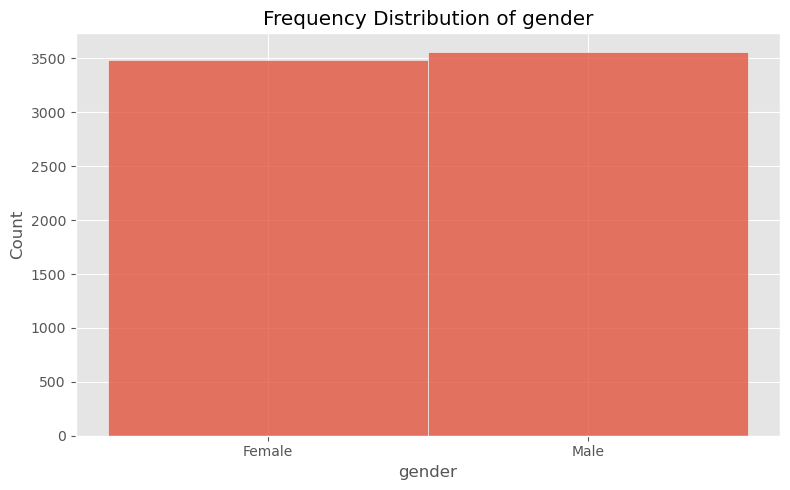


---------------
FEATURE: SENIORCITIZEN
---------------


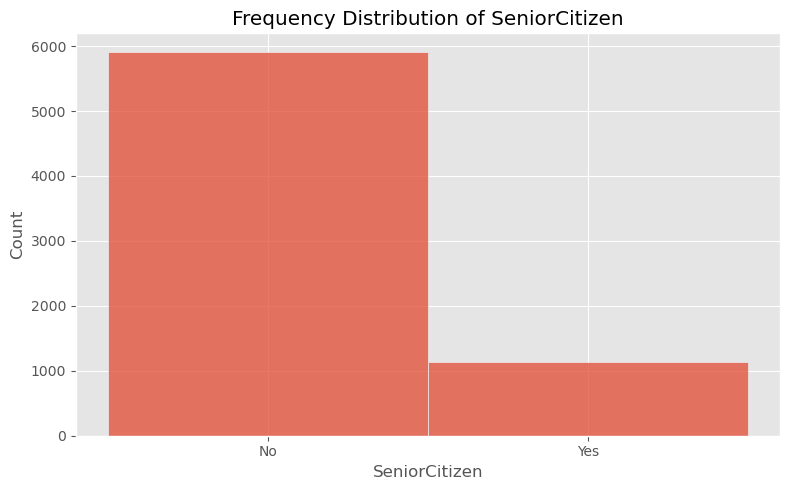


---------------
FEATURE: PARTNER
---------------


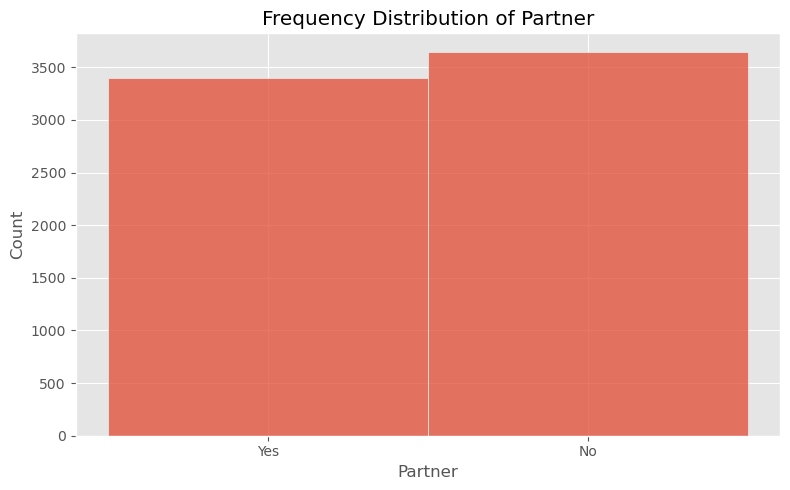


---------------
FEATURE: DEPENDENTS
---------------


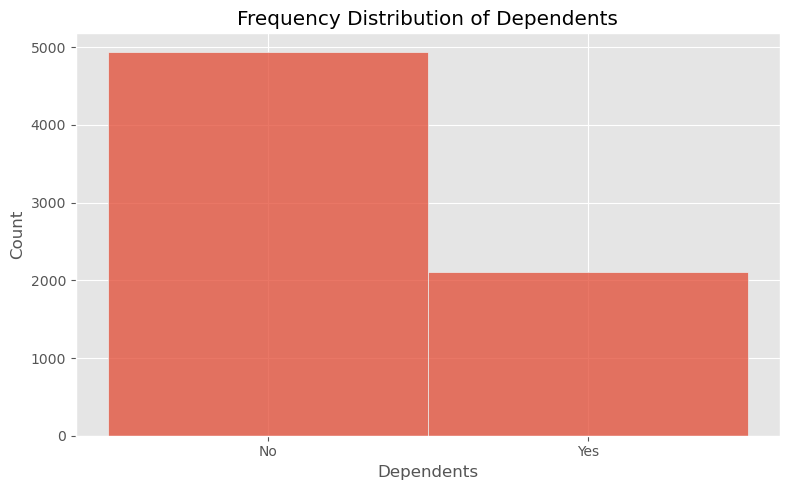


---------------
FEATURE: TENURE
---------------


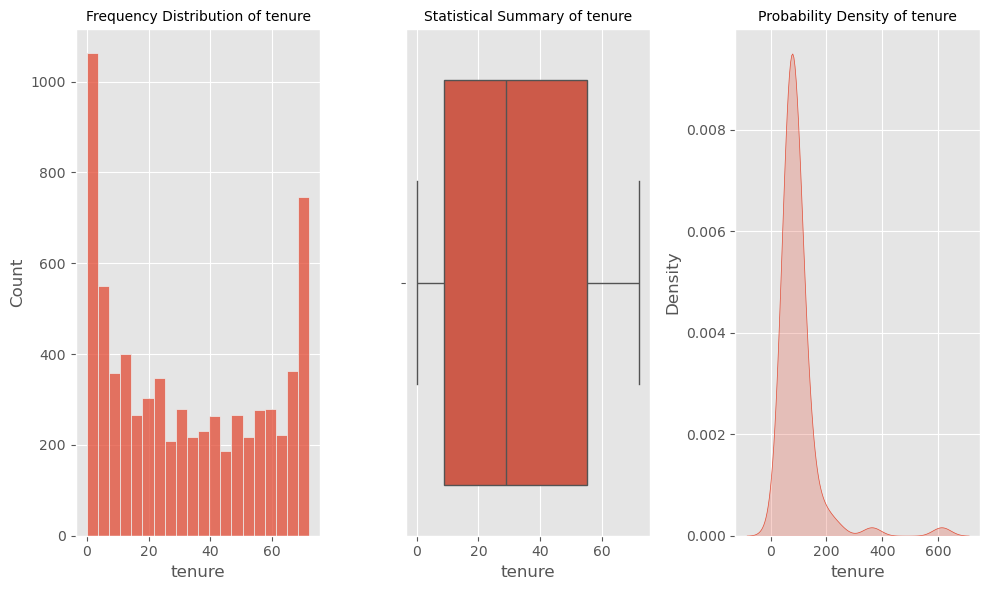


---------------
FEATURE: PHONESERVICE
---------------


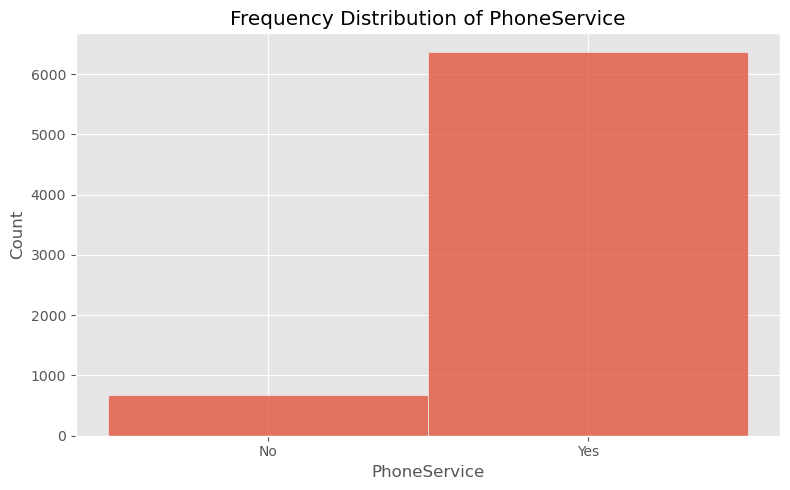


---------------
FEATURE: MULTIPLELINES
---------------


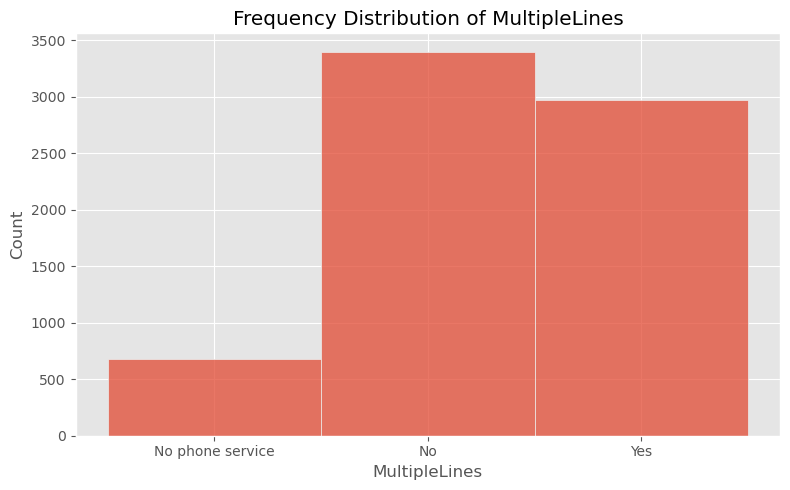


---------------
FEATURE: INTERNETSERVICE
---------------


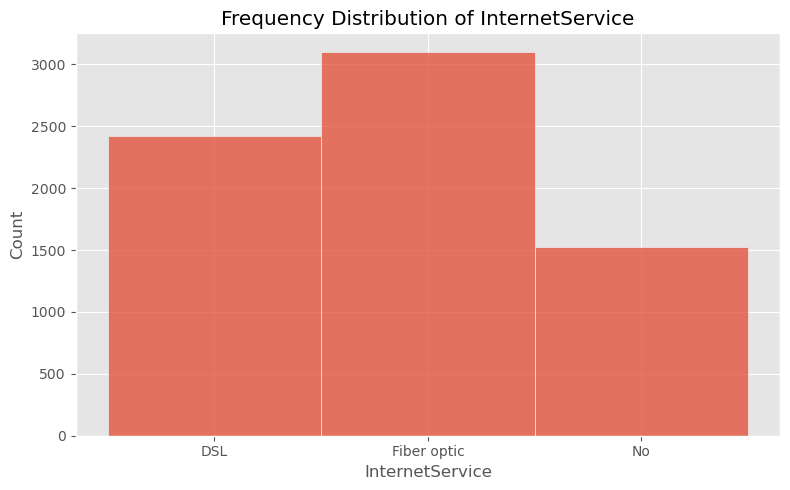


---------------
FEATURE: ONLINESECURITY
---------------


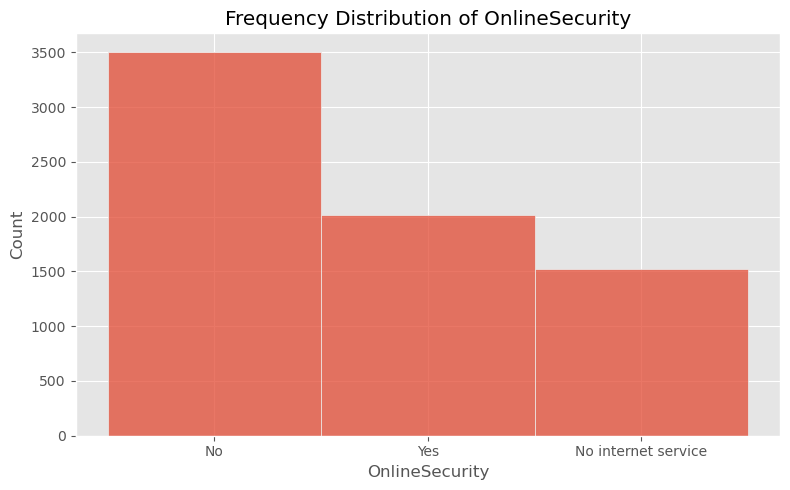


---------------
FEATURE: ONLINEBACKUP
---------------


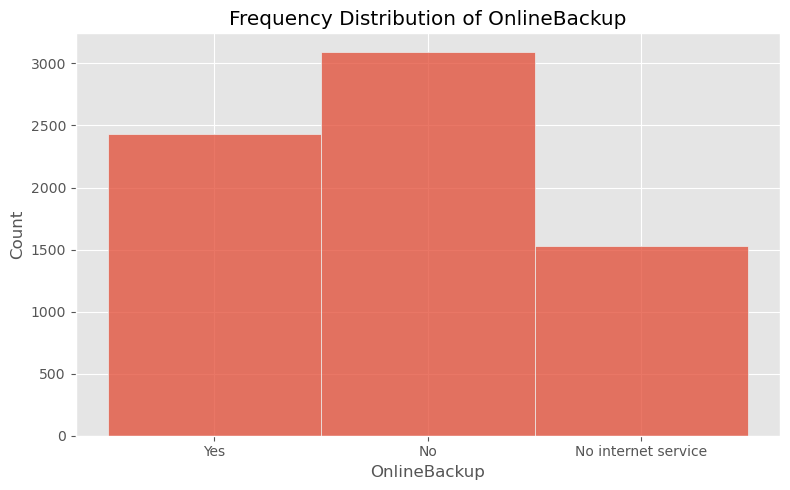


---------------
FEATURE: DEVICEPROTECTION
---------------


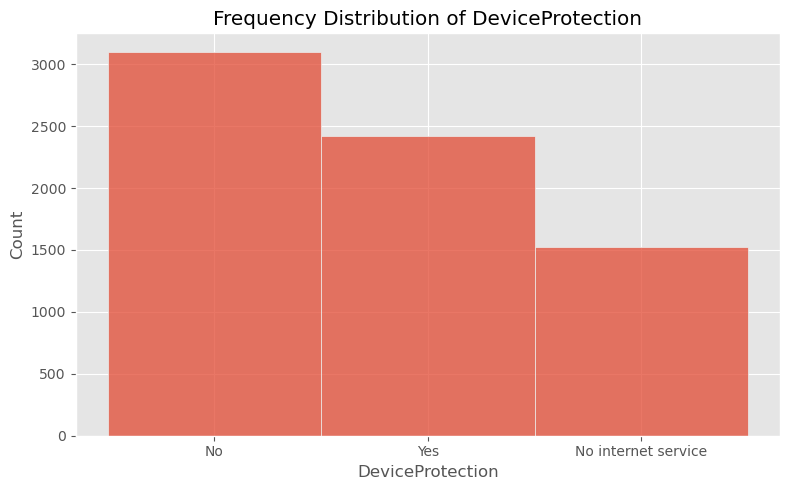


---------------
FEATURE: TECHSUPPORT
---------------


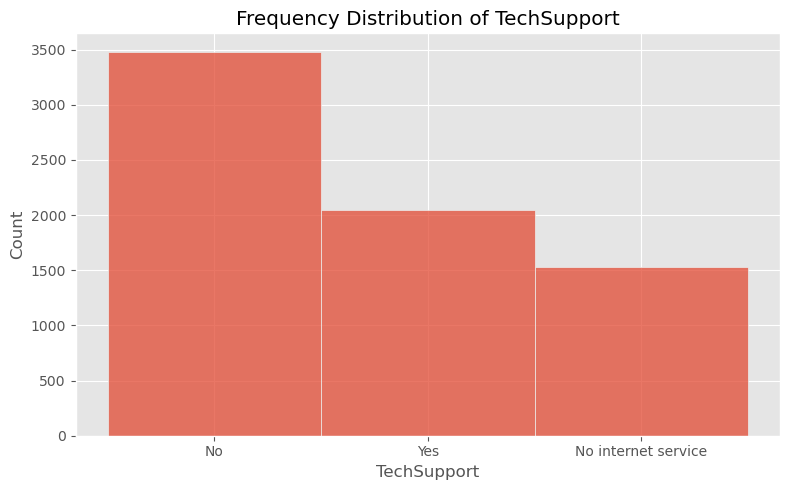


---------------
FEATURE: STREAMINGTV
---------------


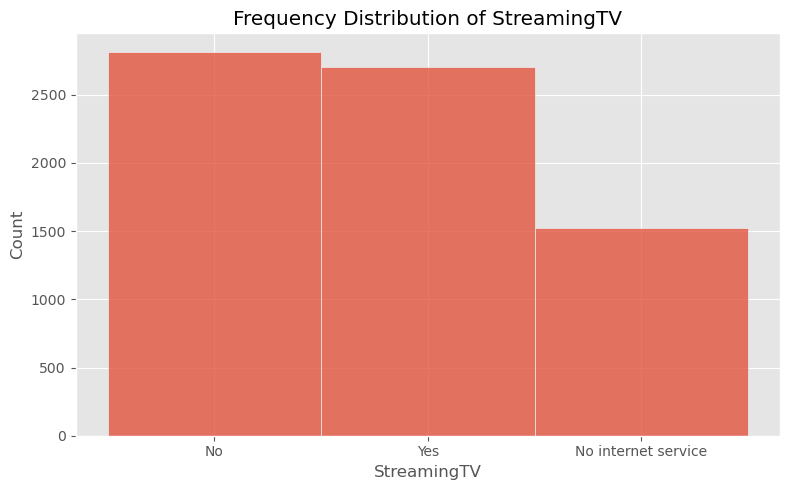


---------------
FEATURE: STREAMINGMOVIES
---------------


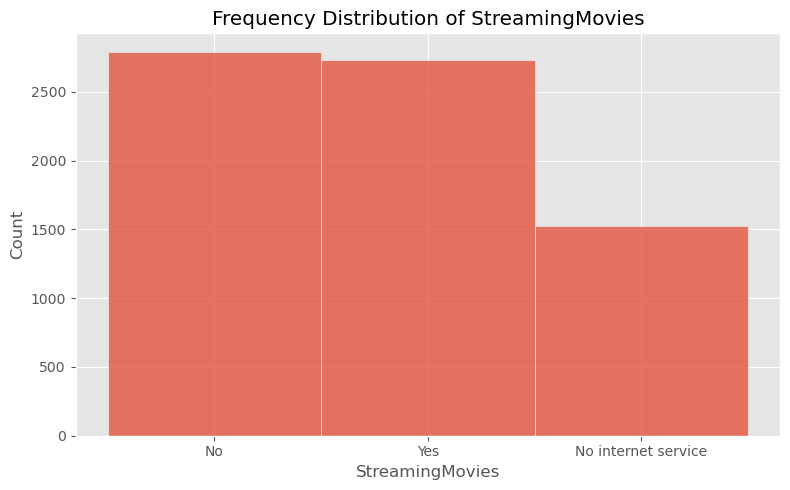


---------------
FEATURE: CONTRACT
---------------


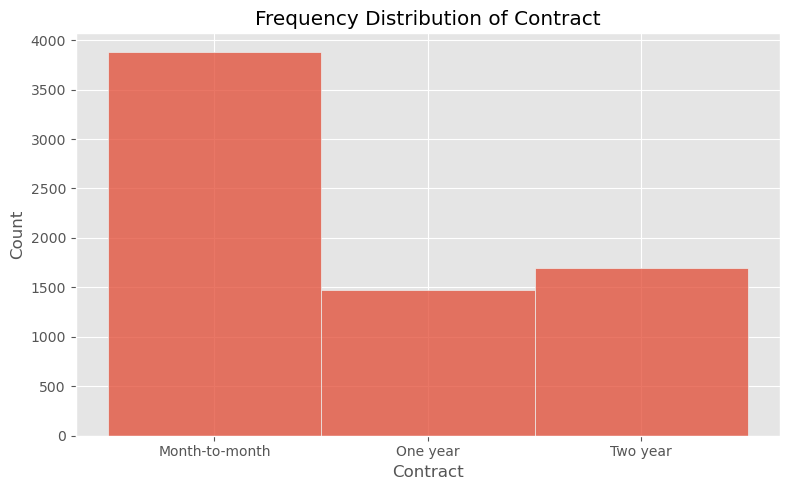


---------------
FEATURE: PAYMENTMETHOD
---------------


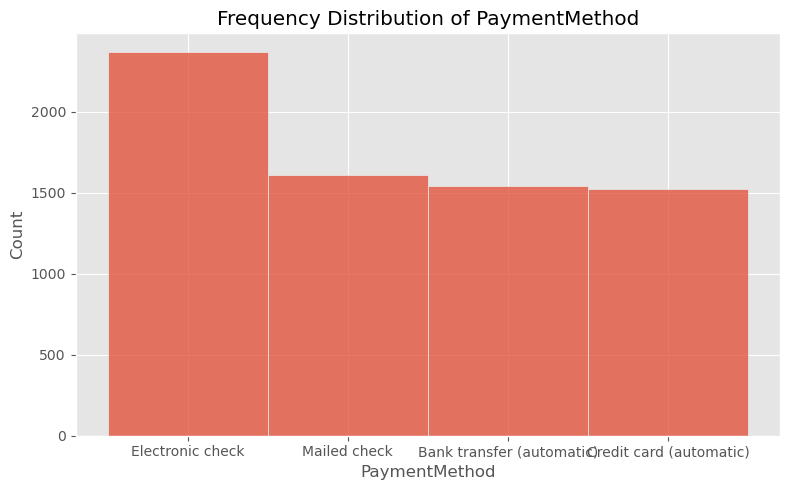


---------------
FEATURE: MONTHLYCHARGES
---------------


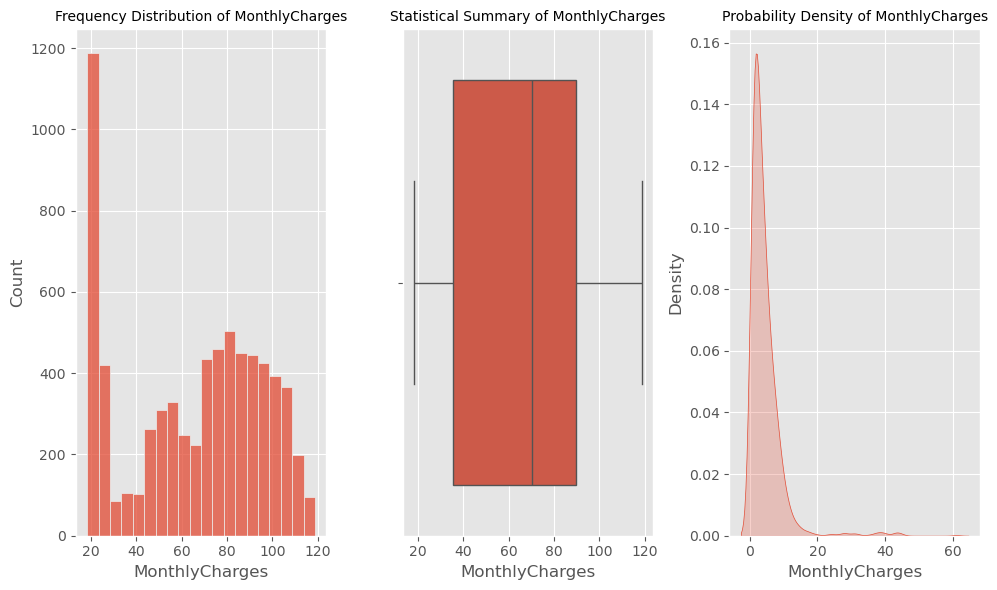


---------------
FEATURE: CHURN
---------------


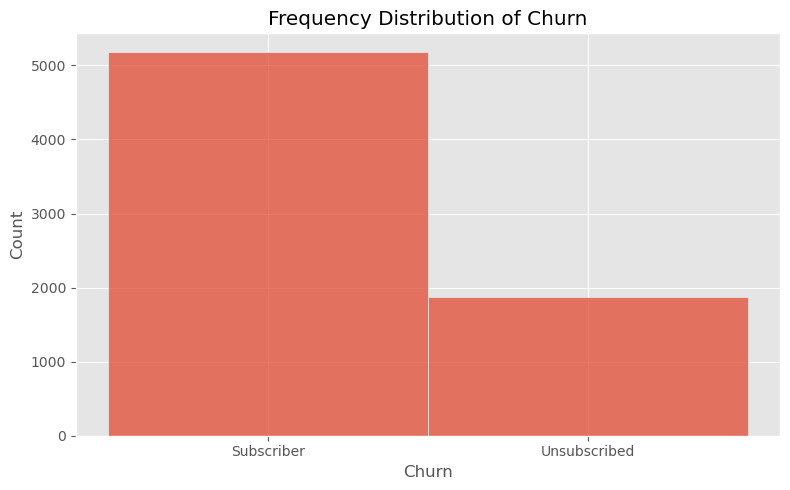

In [2]:
for column in df.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    if len(df[column].unique()) > 4:
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)
        
        sns.boxplot(ax=ax2, x=df[column])
        ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
        ax2.set_xlabel(column)

        sns.kdeplot(ax=ax3, data=df[column].value_counts(), shade=True)
        ax3.set_title(f'Probability Density of {column}', fontsize=10)
        ax3.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()
    else:
        fig, ax1 = plt.subplots(1, figsize=(8,5))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}')
        ax1.set_xlabel(column)

        plt.tight_layout()
        plt.show()

## Feature Relationships
- Scatterplot
- Pairplot
- Heatmap Correlation
- Groupby Comparisons

### Scatterplot of Target Feature

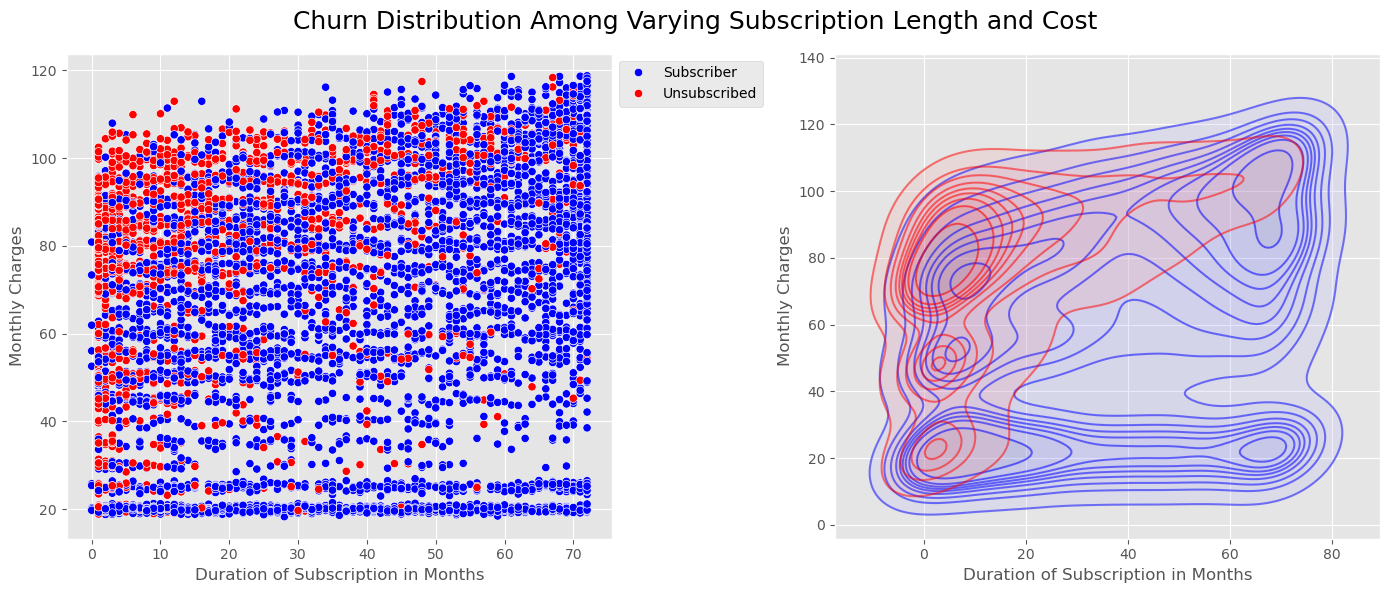

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Churn Distribution Among Varying Subscription Length and Cost', fontsize=18)
sns.scatterplot(ax=ax1, data=df, x='tenure', y='MonthlyCharges', hue='Churn', \
                palette={'Subscriber': 'blue', 'Unsubscribed':'red'})
ax1.set_xlabel('Duration of Subscription in Months')
ax1.set_ylabel('Monthly Charges')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')

sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', fill=True, alpha=0.25, \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'}, legend=False)
sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False, \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'}, alpha=0.5, linewidth=1)
ax2.set_xlabel('Duration of Subscription in Months')
ax2.set_ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

### Correlation Heatmap

In [4]:
df_ordinal = df[['Churn','tenure','MonthlyCharges']]
df_ordinal['Churn'] = df['Churn'].str.strip().replace('Subscriber',0).replace('Unsubscribed',1)
correlation_matrix = df_ordinal.corr()
print(correlation_matrix)

                Churn  tenure  MonthlyCharges
Churn            1.00   -0.35            0.19
tenure          -0.35    1.00            0.25
MonthlyCharges   0.19    0.25            1.00


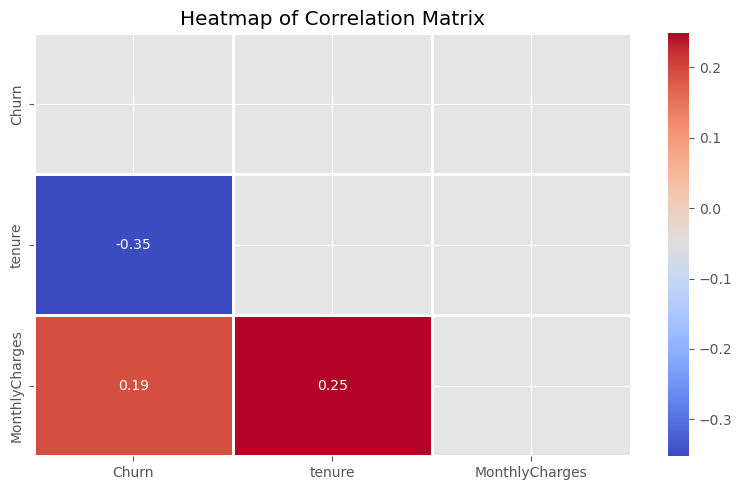

In [5]:
fig, ax = plt.subplots(1, figsize=(8,5))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, linewidths=2)
ax.set_title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()

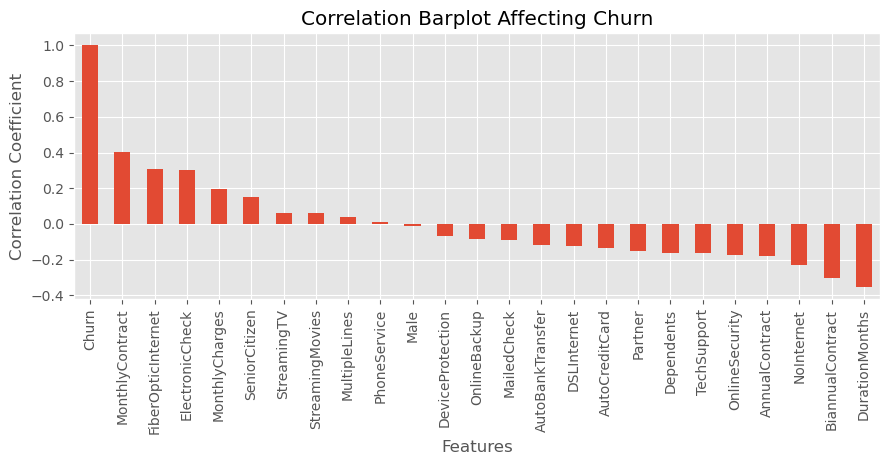

In [6]:
df_encoded = pd.read_csv('../data/encoded_telco_churn.csv')
df_encoded.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
plt.title('Correlation Barplot Affecting Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

### Pairplot Relationships

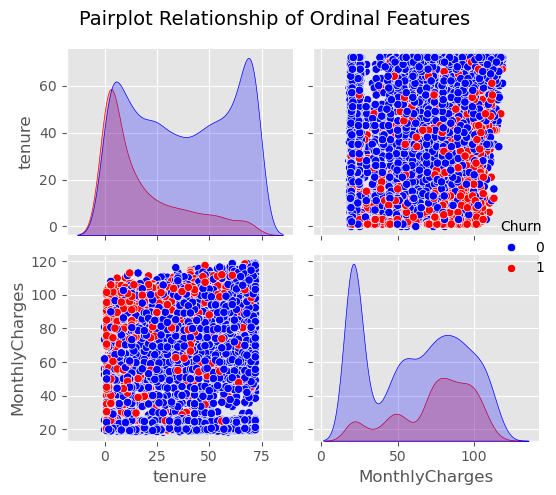

In [7]:
sns.pairplot(data=df_ordinal, hue='Churn', palette={0:'blue', 1:'red'})
plt.suptitle('Pairplot Relationship of Ordinal Features', fontsize=14)
plt.tight_layout()
plt.show()

### Groupby Comparisons

In [8]:
df_nominal = df[[
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'Churn']]

#### Groupby `Churn`


---------------
FEATURE: GENDER
---------------


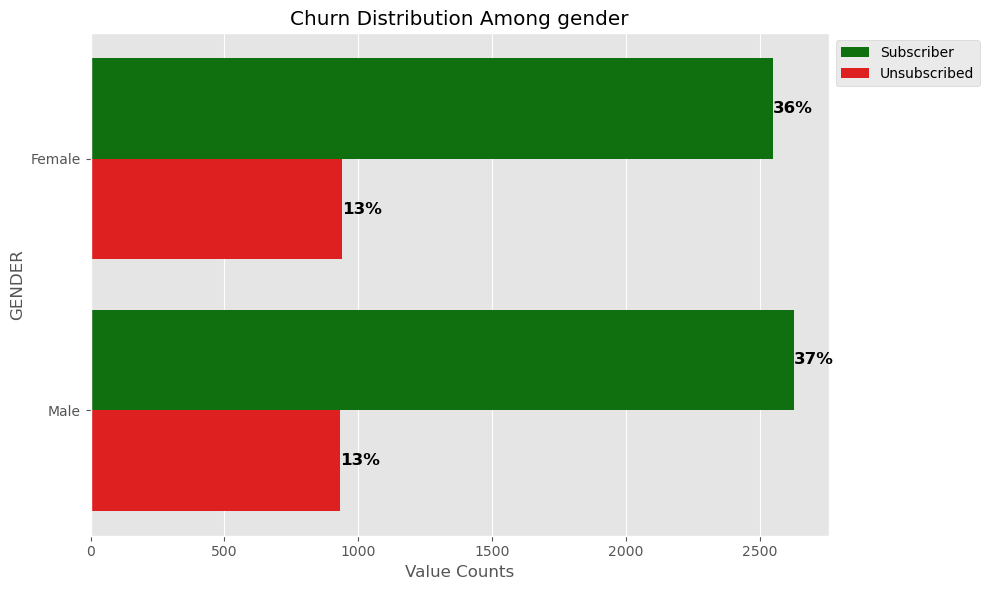


---------------
FEATURE: SENIORCITIZEN
---------------


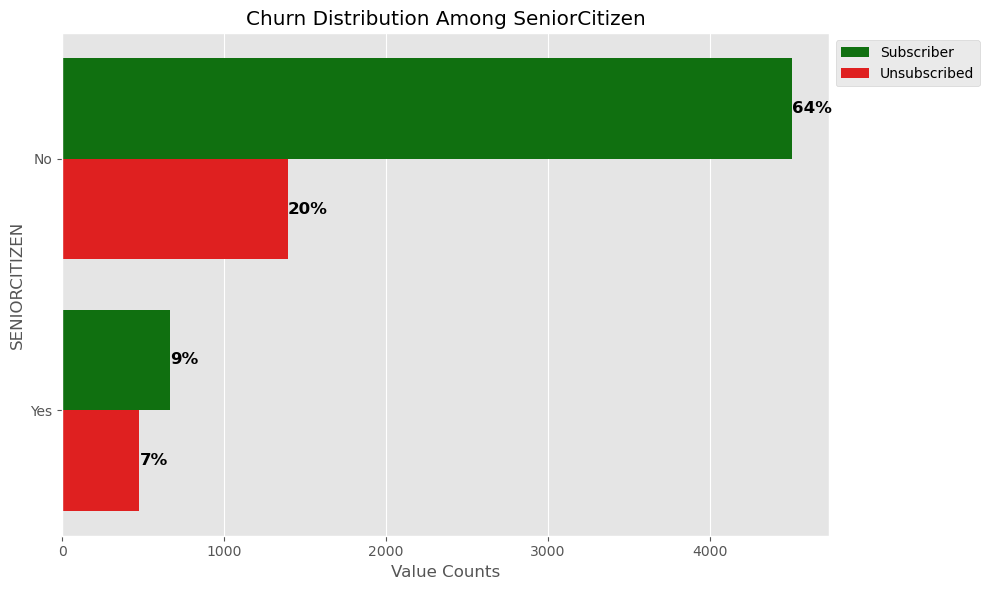


---------------
FEATURE: PARTNER
---------------


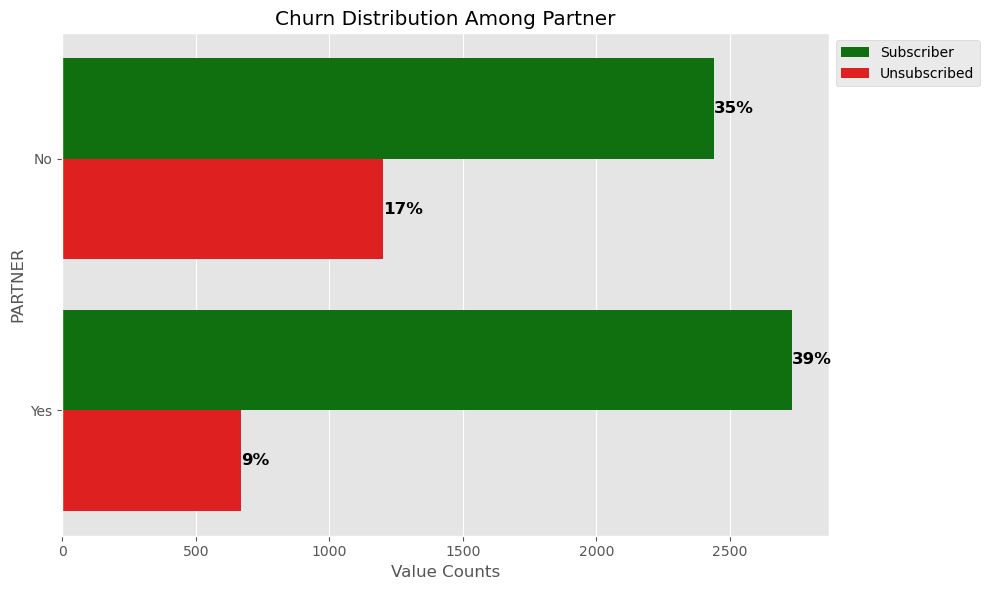


---------------
FEATURE: DEPENDENTS
---------------


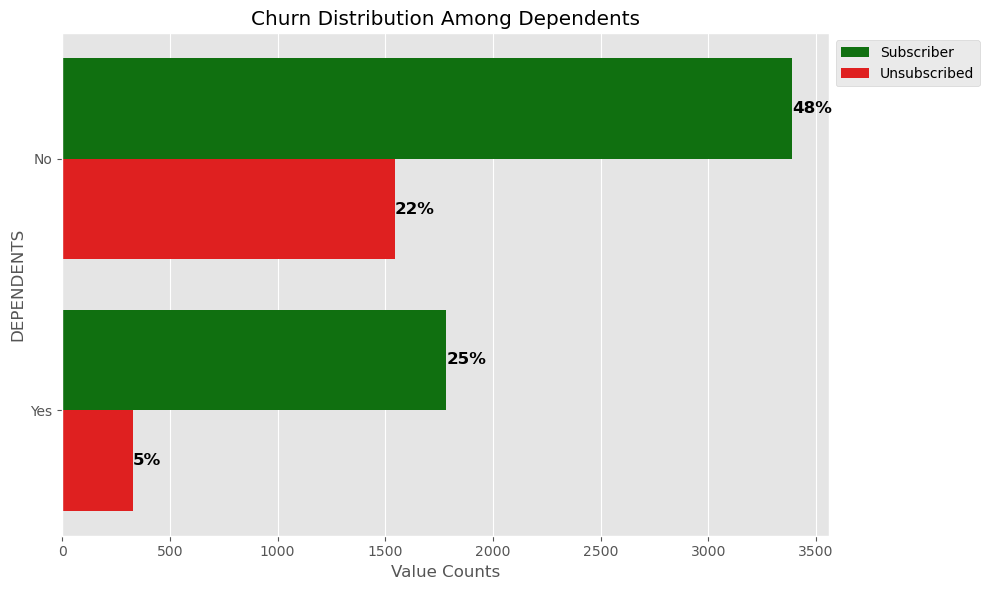


---------------
FEATURE: PHONESERVICE
---------------


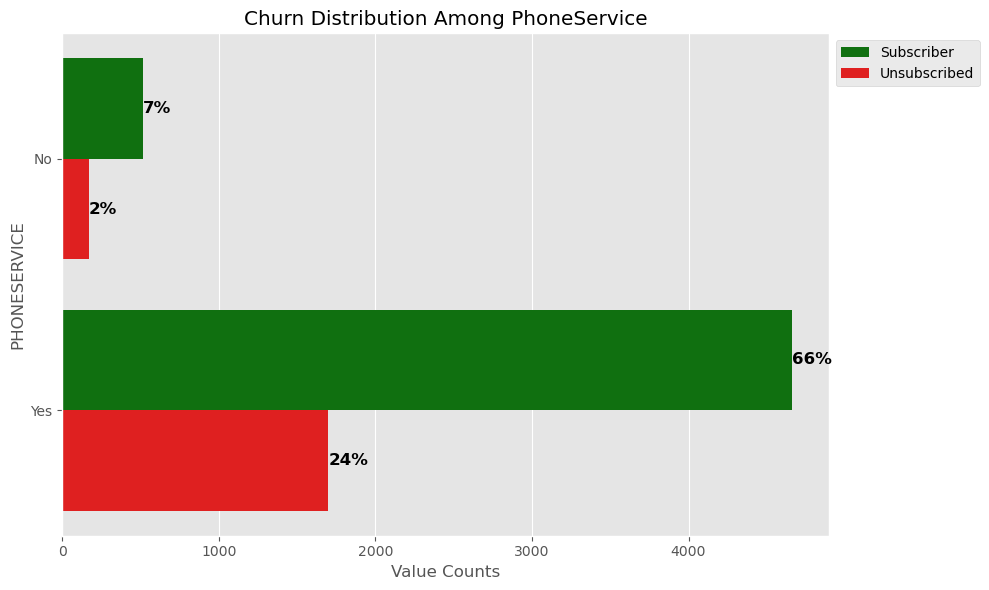


---------------
FEATURE: MULTIPLELINES
---------------


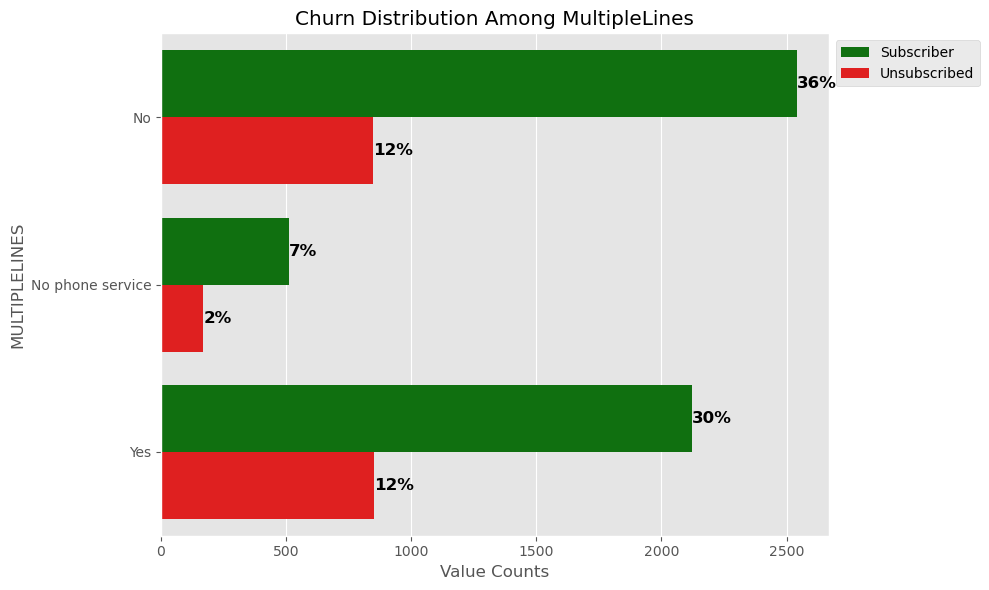


---------------
FEATURE: INTERNETSERVICE
---------------


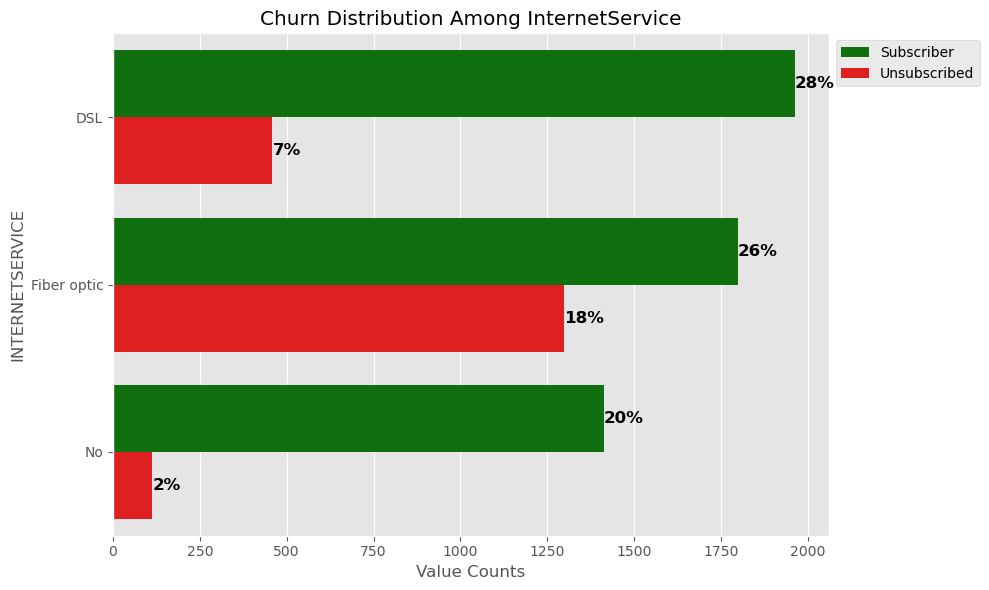


---------------
FEATURE: ONLINESECURITY
---------------


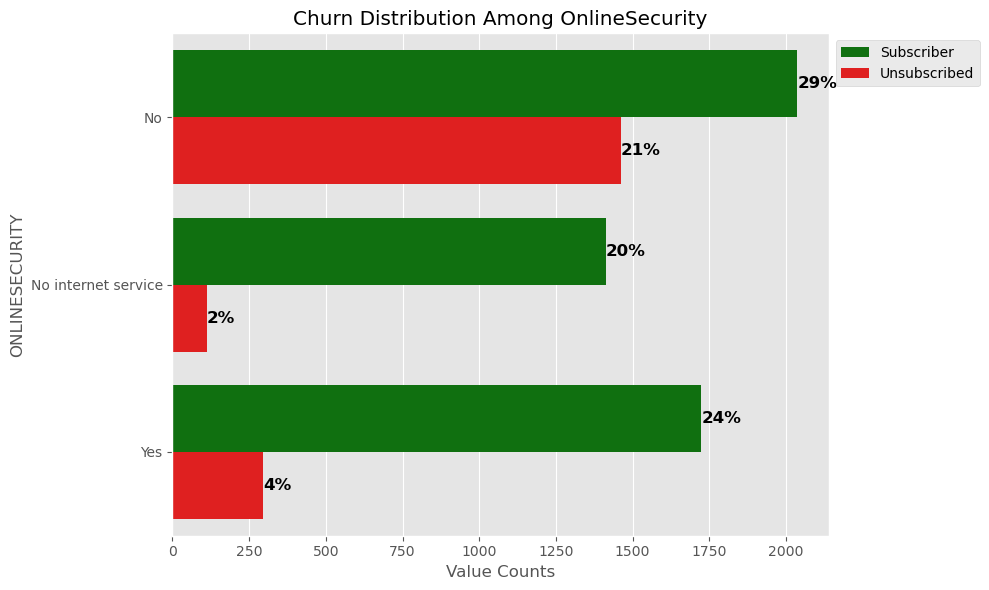


---------------
FEATURE: ONLINEBACKUP
---------------


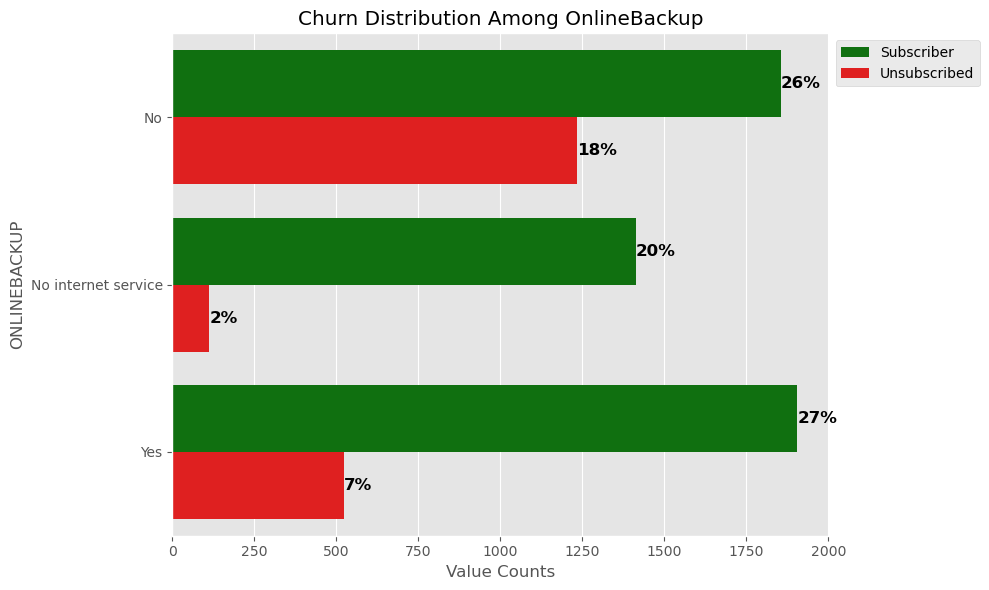


---------------
FEATURE: DEVICEPROTECTION
---------------


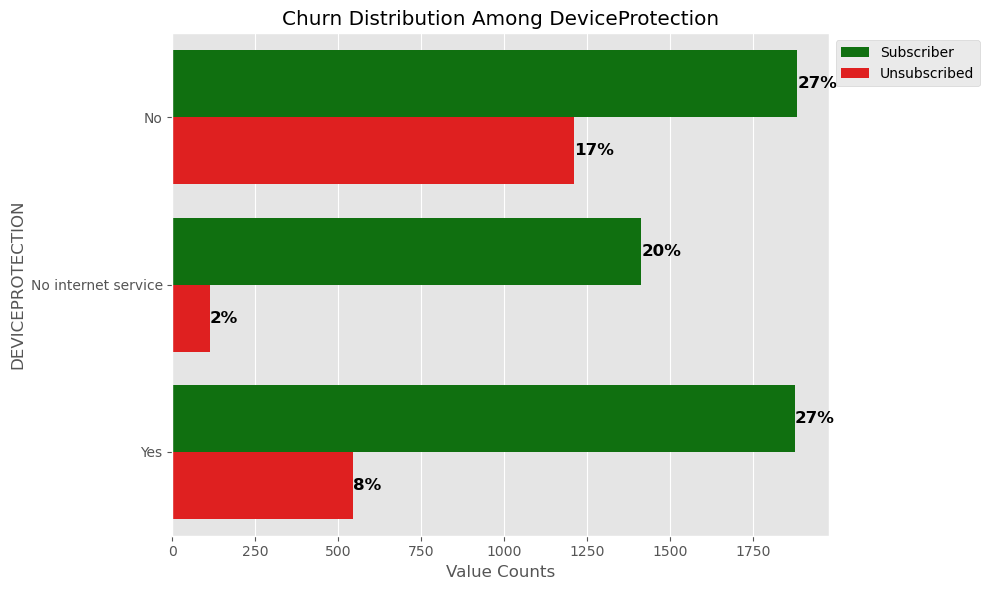


---------------
FEATURE: TECHSUPPORT
---------------


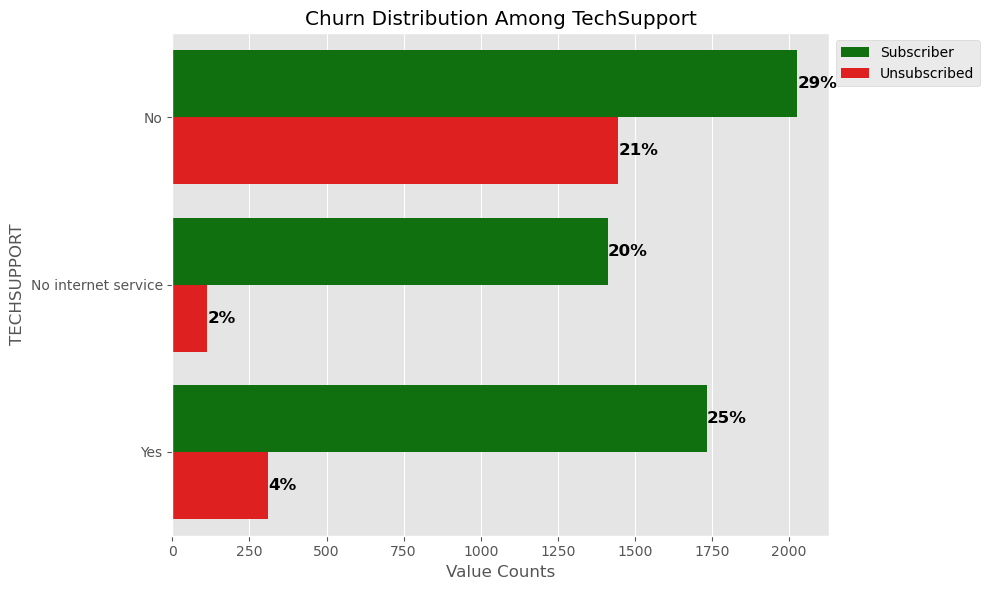


---------------
FEATURE: STREAMINGTV
---------------


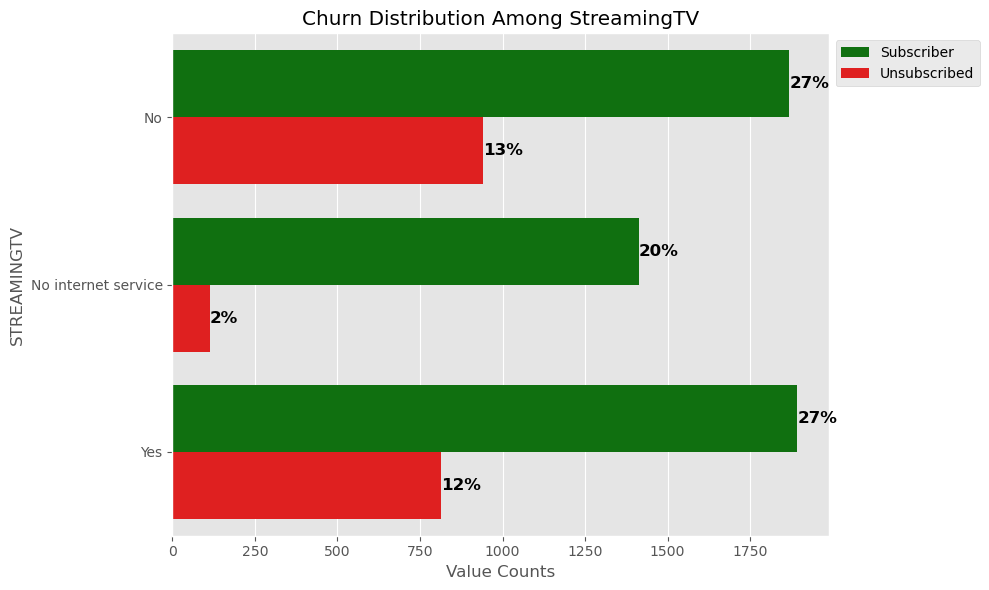


---------------
FEATURE: STREAMINGMOVIES
---------------


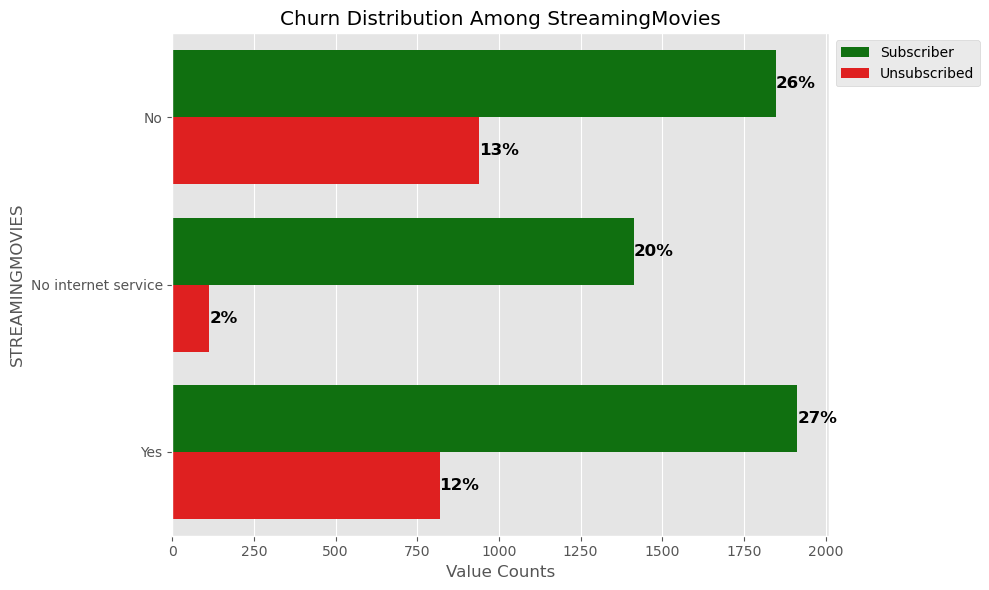


---------------
FEATURE: CONTRACT
---------------


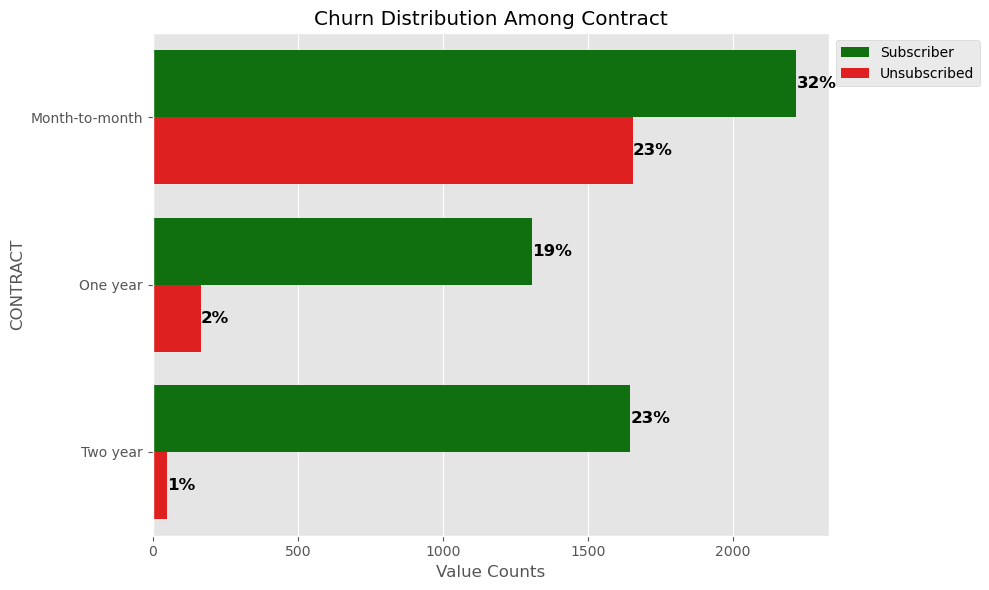

In [9]:
for column in df_nominal.columns:
    if column == 'Churn':
        break
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    def create_churn_plot(column):
        grouped = df_nominal.groupby(['Churn', column]).size().rename('count').reset_index()
        fig, ax = plt.subplots(1, figsize=(10, 6))
        sns.barplot(ax=ax, data=grouped, x='count', y=column, hue='Churn',
                    palette={'Subscriber': 'green', 'Unsubscribed': 'red'})
        ax.set_title(f'Churn Distribution Among {column}')
        ax.set_xlabel('Value Counts')
        ax.set_ylabel(column.upper())
        ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot
        for p in ax.patches:
            if p.get_width() > 0:
                percentage = p.get_width() / df_nominal[column].value_counts().sum() * 100
                ax.annotate(format(f'{percentage:.0f}%'),
                            (p.get_width(), p.get_y() + p.get_height() / 2.),
                            ha='left', va='center',
                            xytext=(0, 0),  # Adjust spacing
                            textcoords='offset points', fontweight='semibold', fontsize=12, color='black')

        plt.tight_layout()
        return plt.show()
    
    create_churn_plot(column)

#### Groupby `Add-ons`

In [10]:
add_ons = ['OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']


---------------
FEATURE: GENDER
---------------


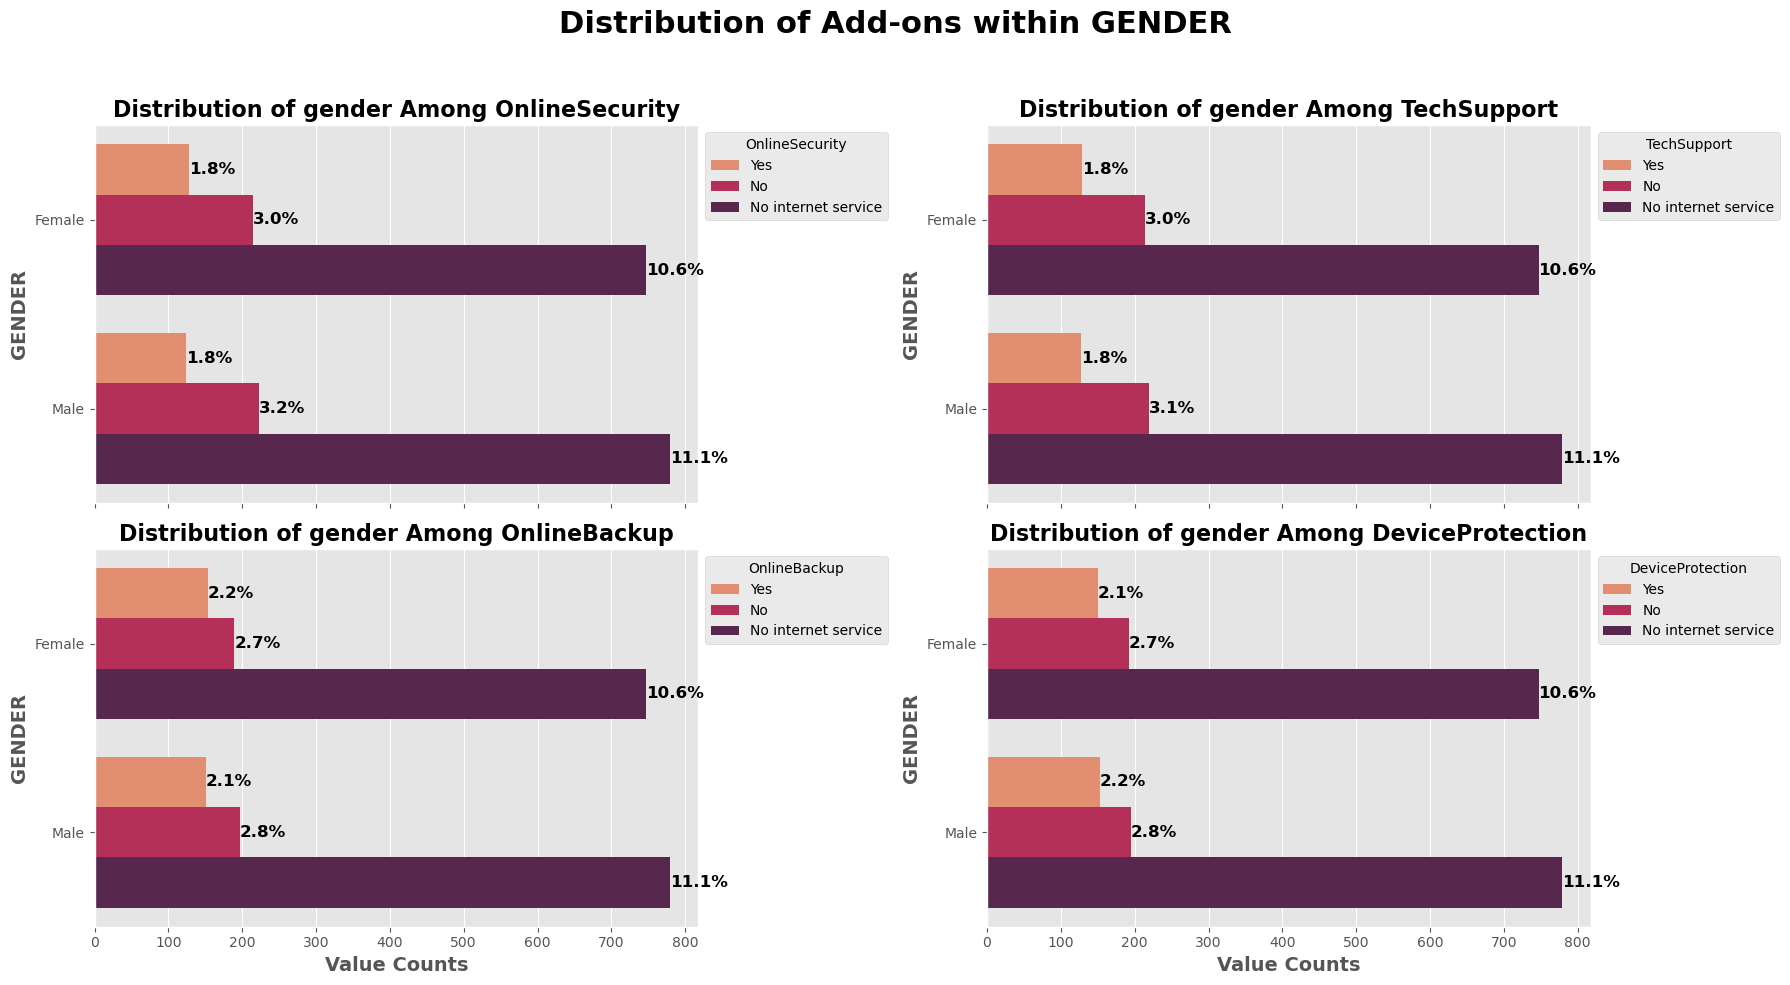


---------------
FEATURE: SENIORCITIZEN
---------------


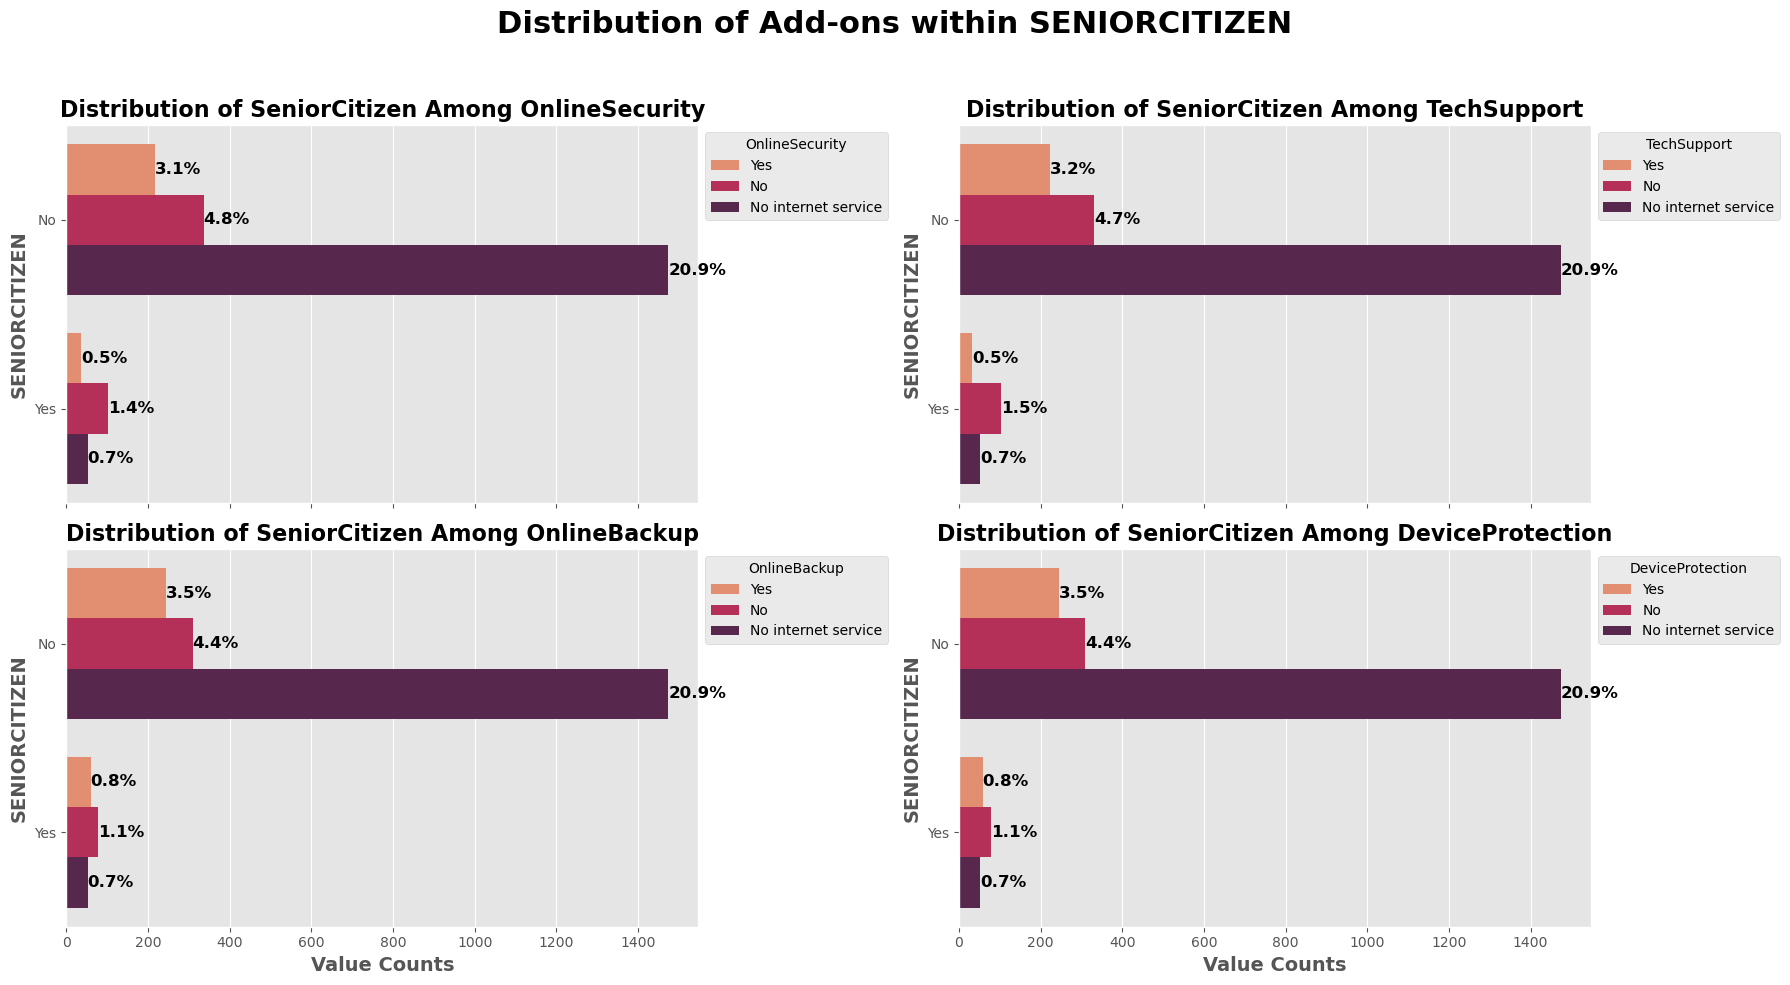


---------------
FEATURE: PARTNER
---------------


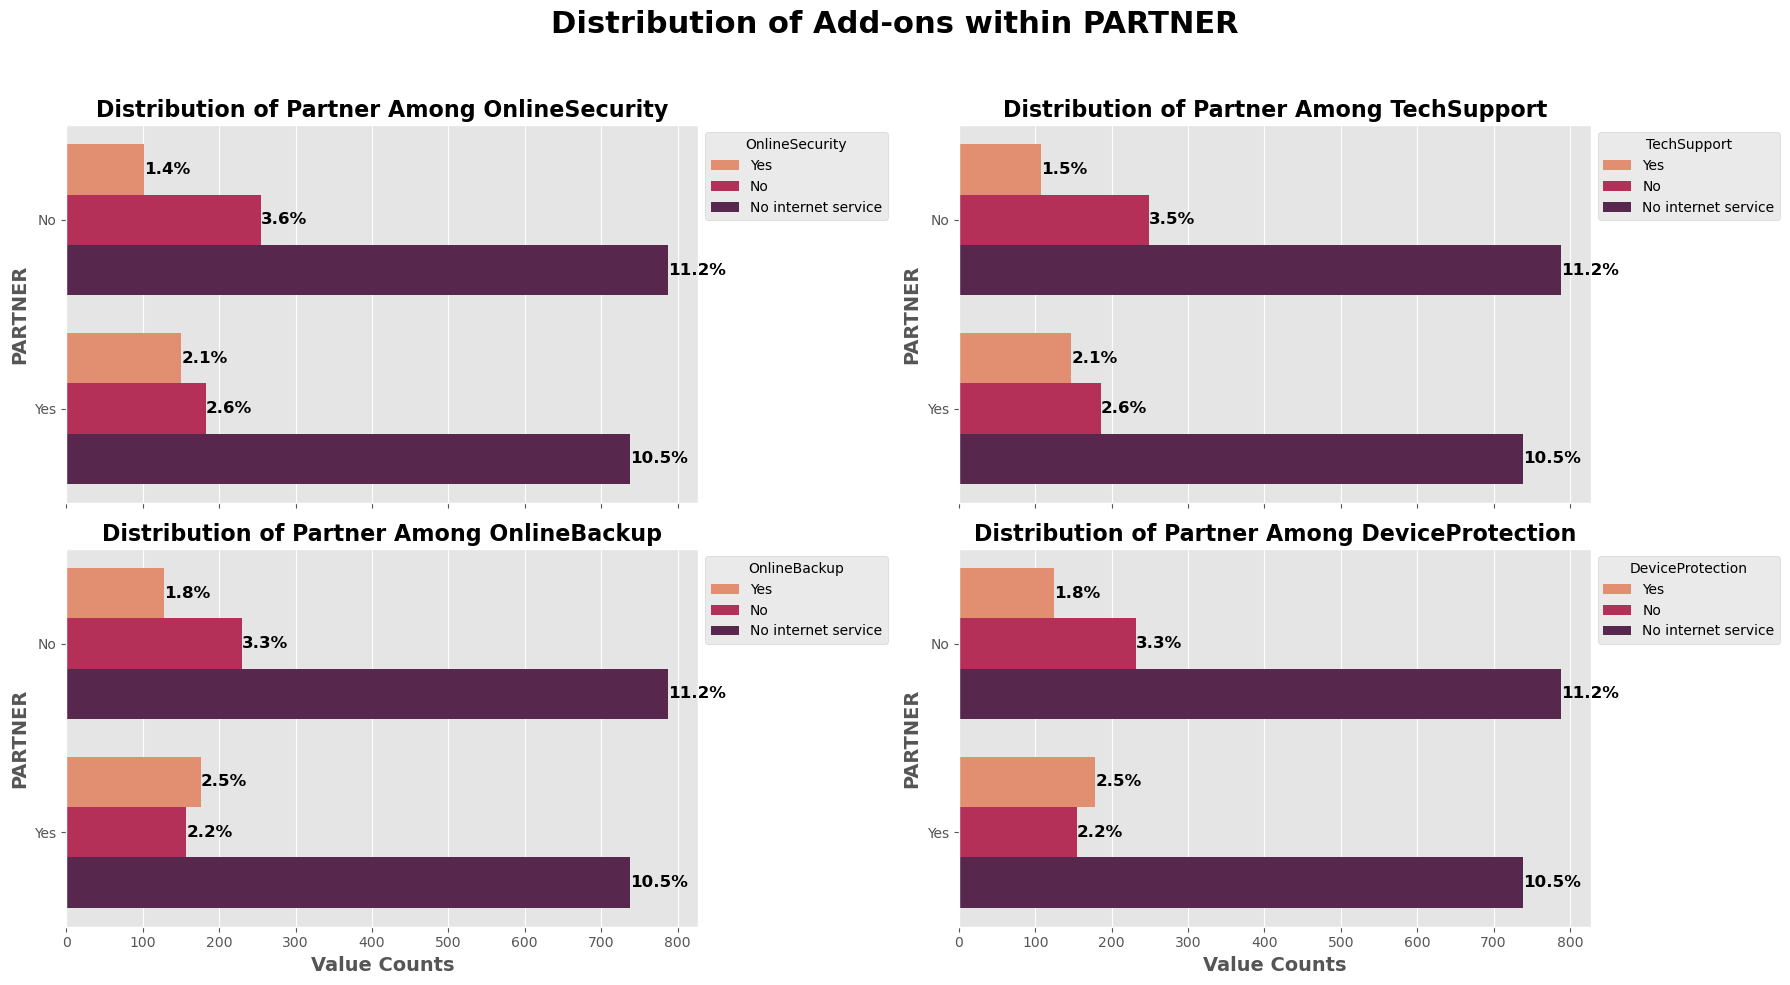


---------------
FEATURE: DEPENDENTS
---------------


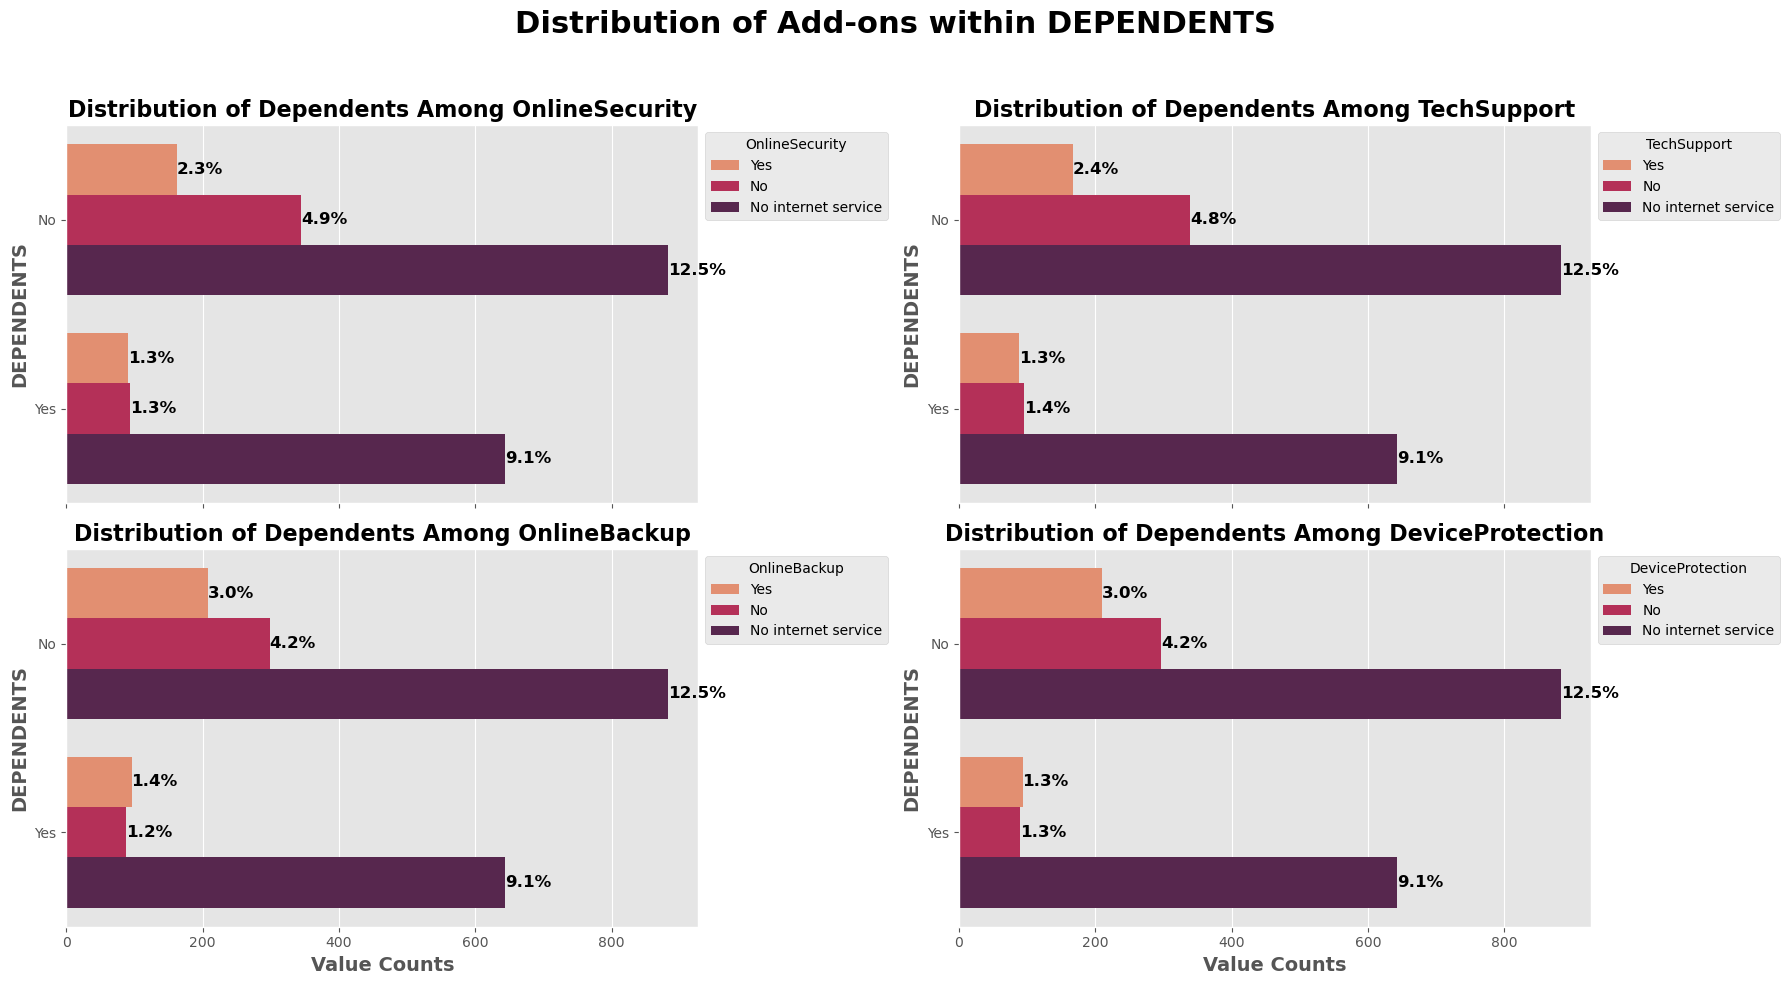


---------------
FEATURE: PHONESERVICE
---------------


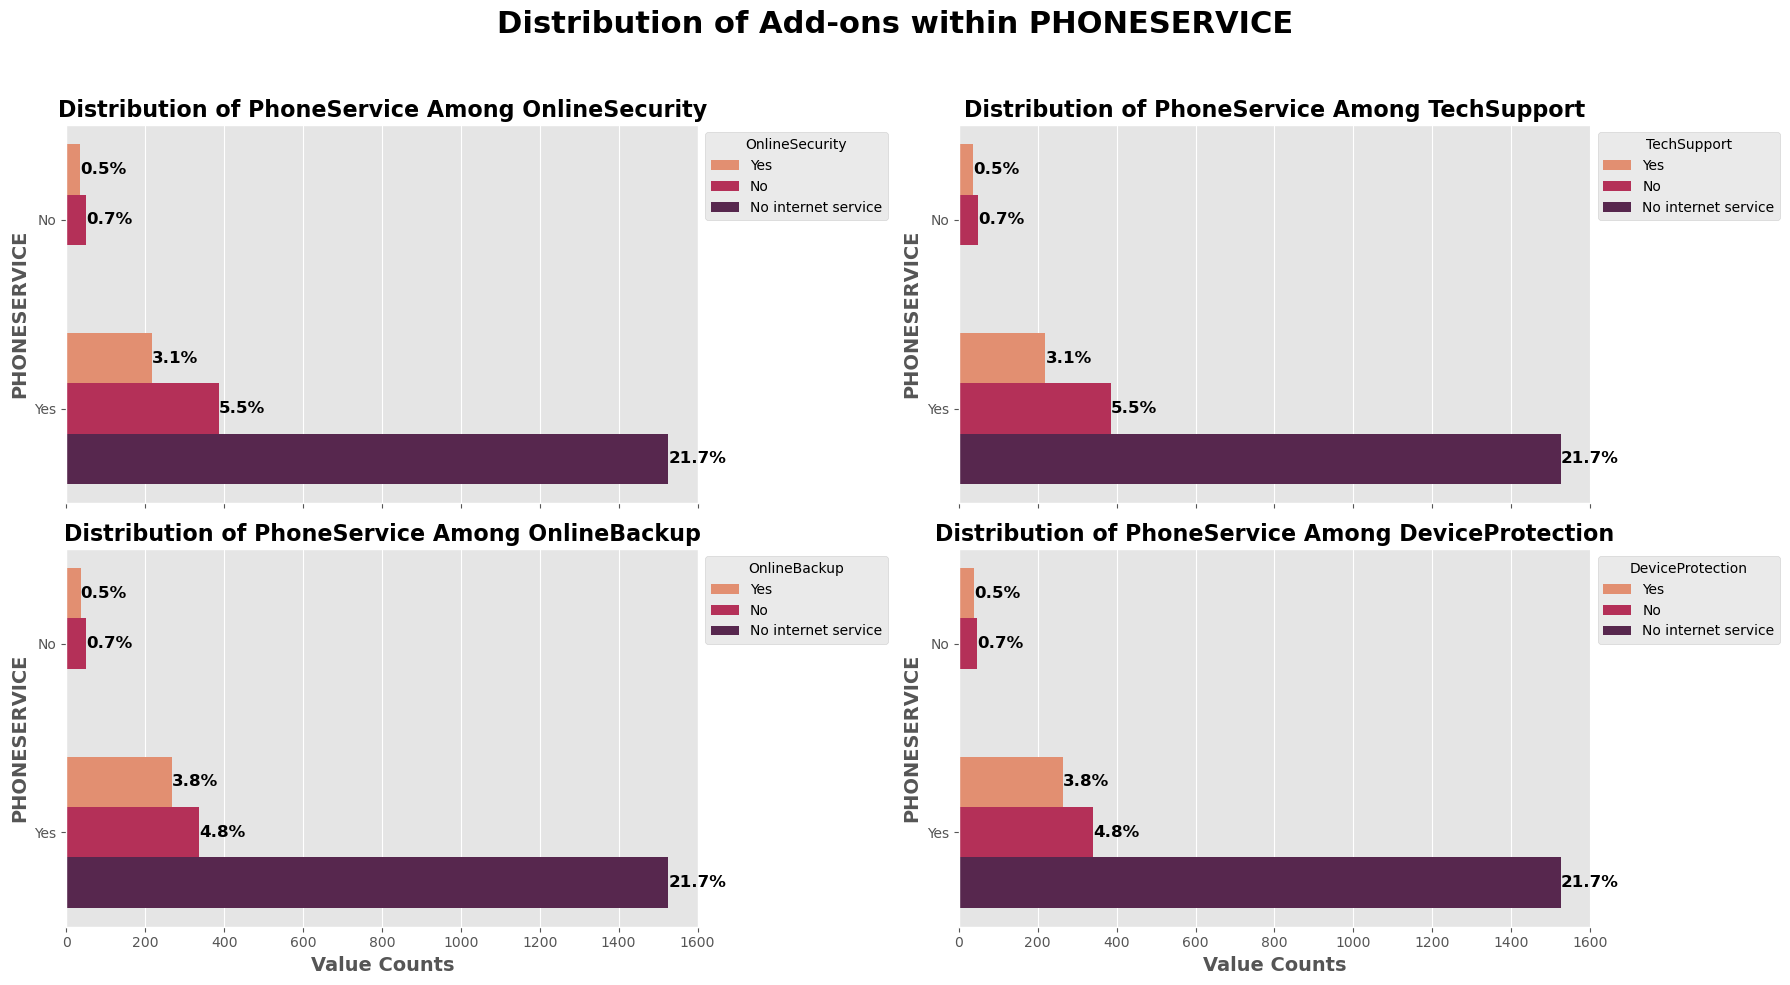


---------------
FEATURE: MULTIPLELINES
---------------


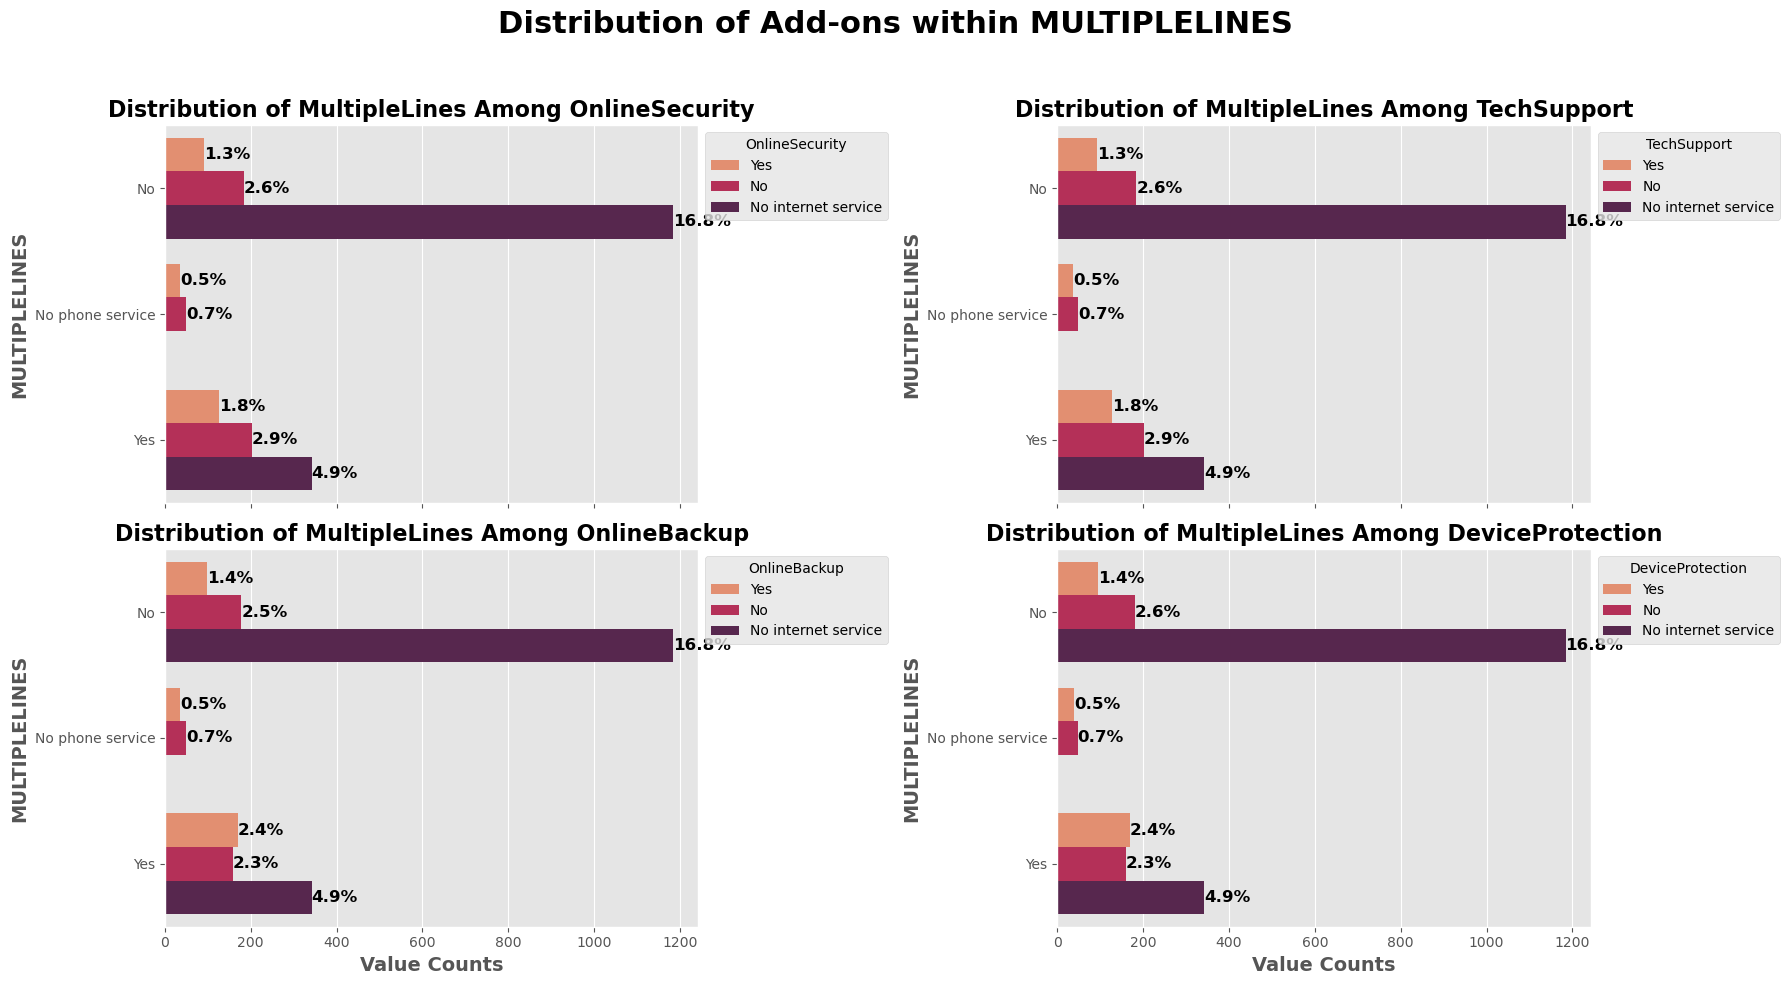


---------------
FEATURE: INTERNETSERVICE
---------------


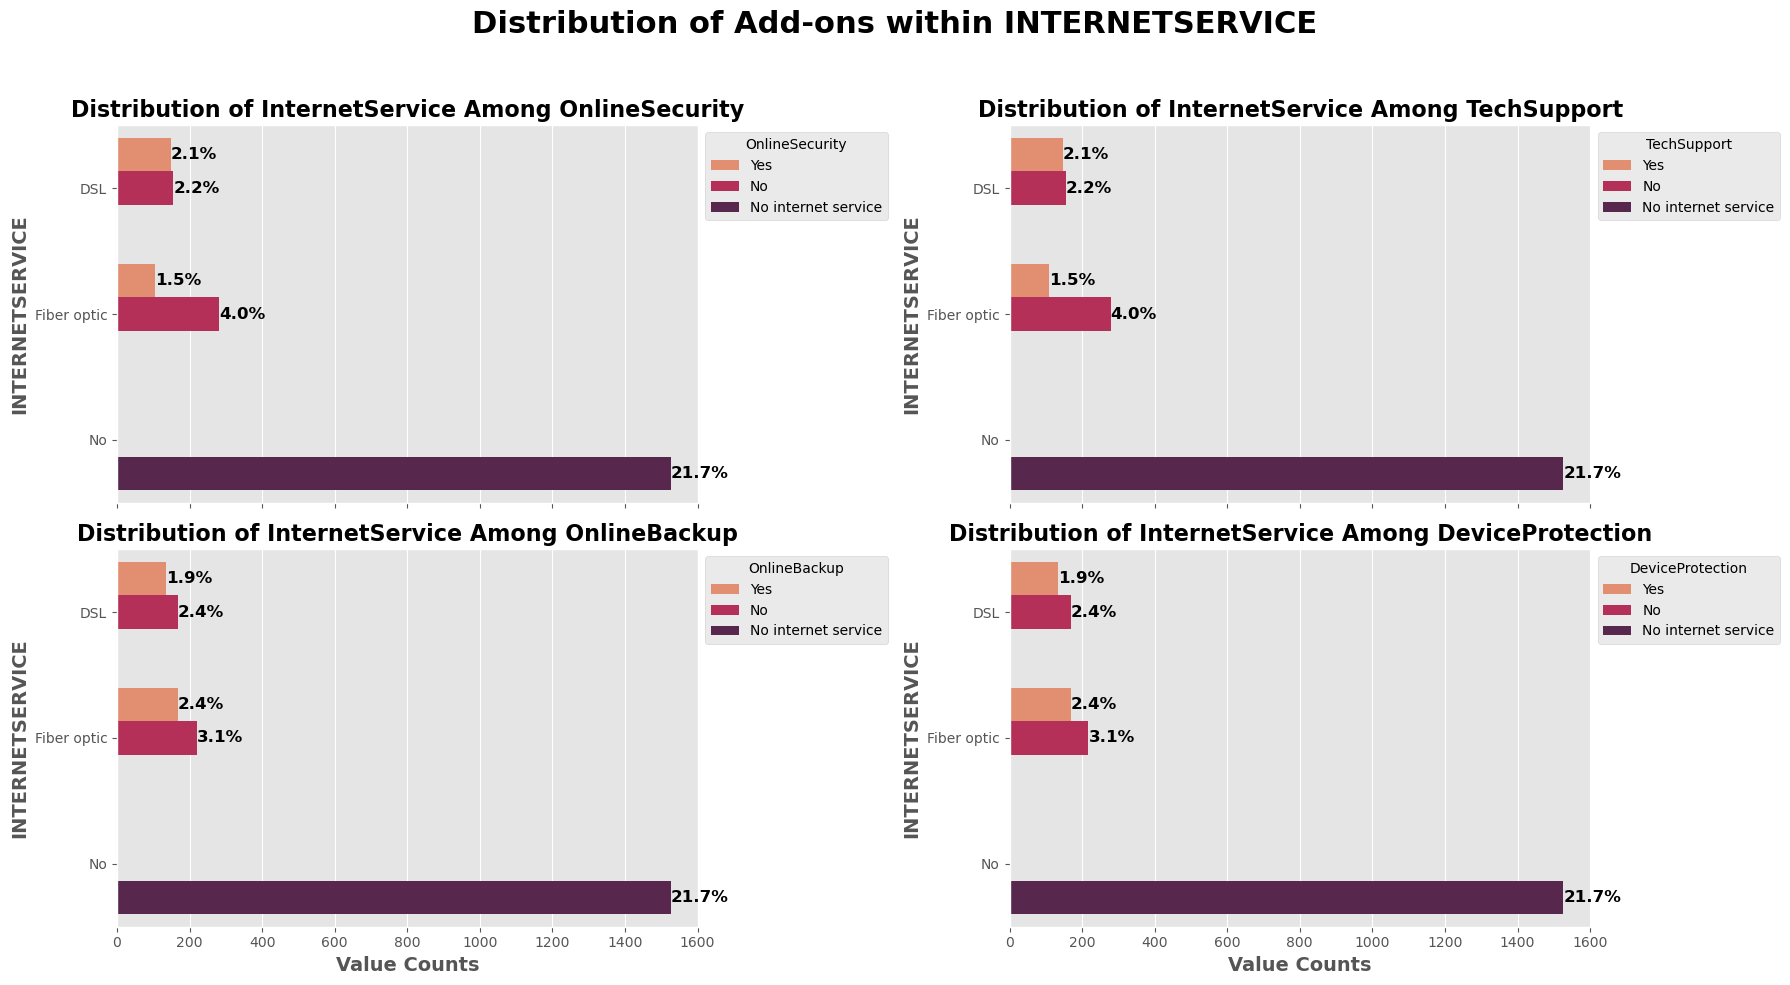


---------------
FEATURE: STREAMINGTV
---------------


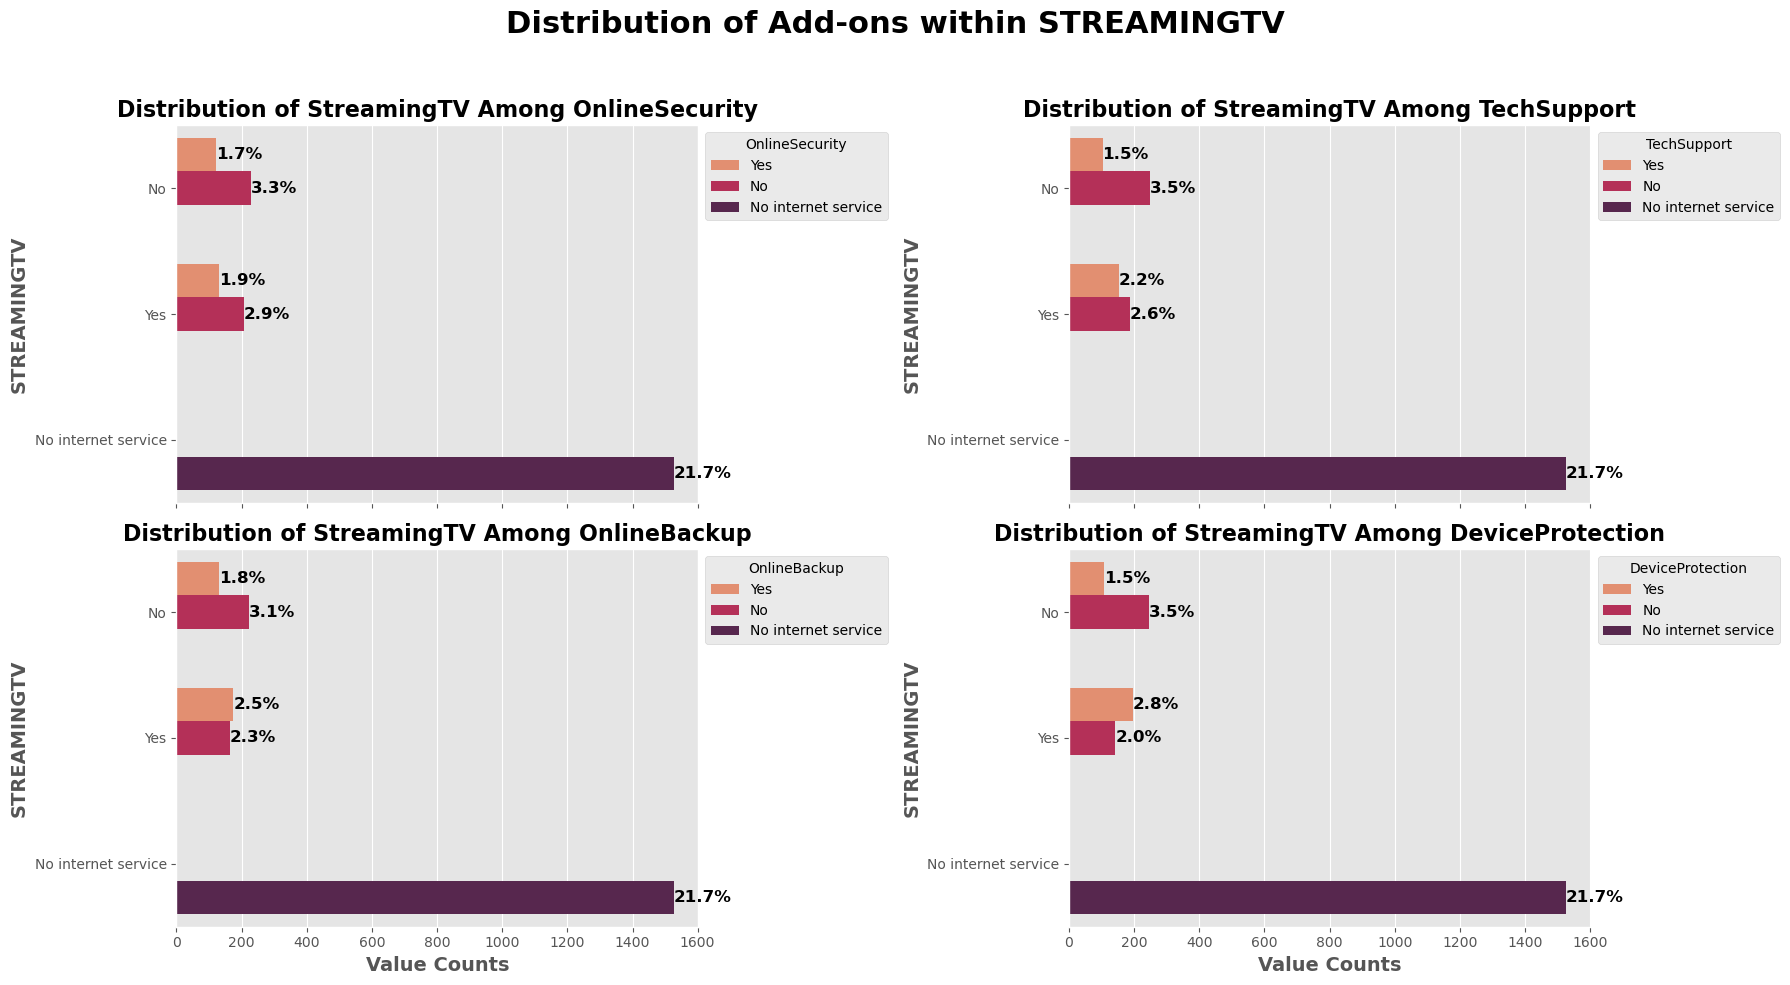


---------------
FEATURE: STREAMINGMOVIES
---------------


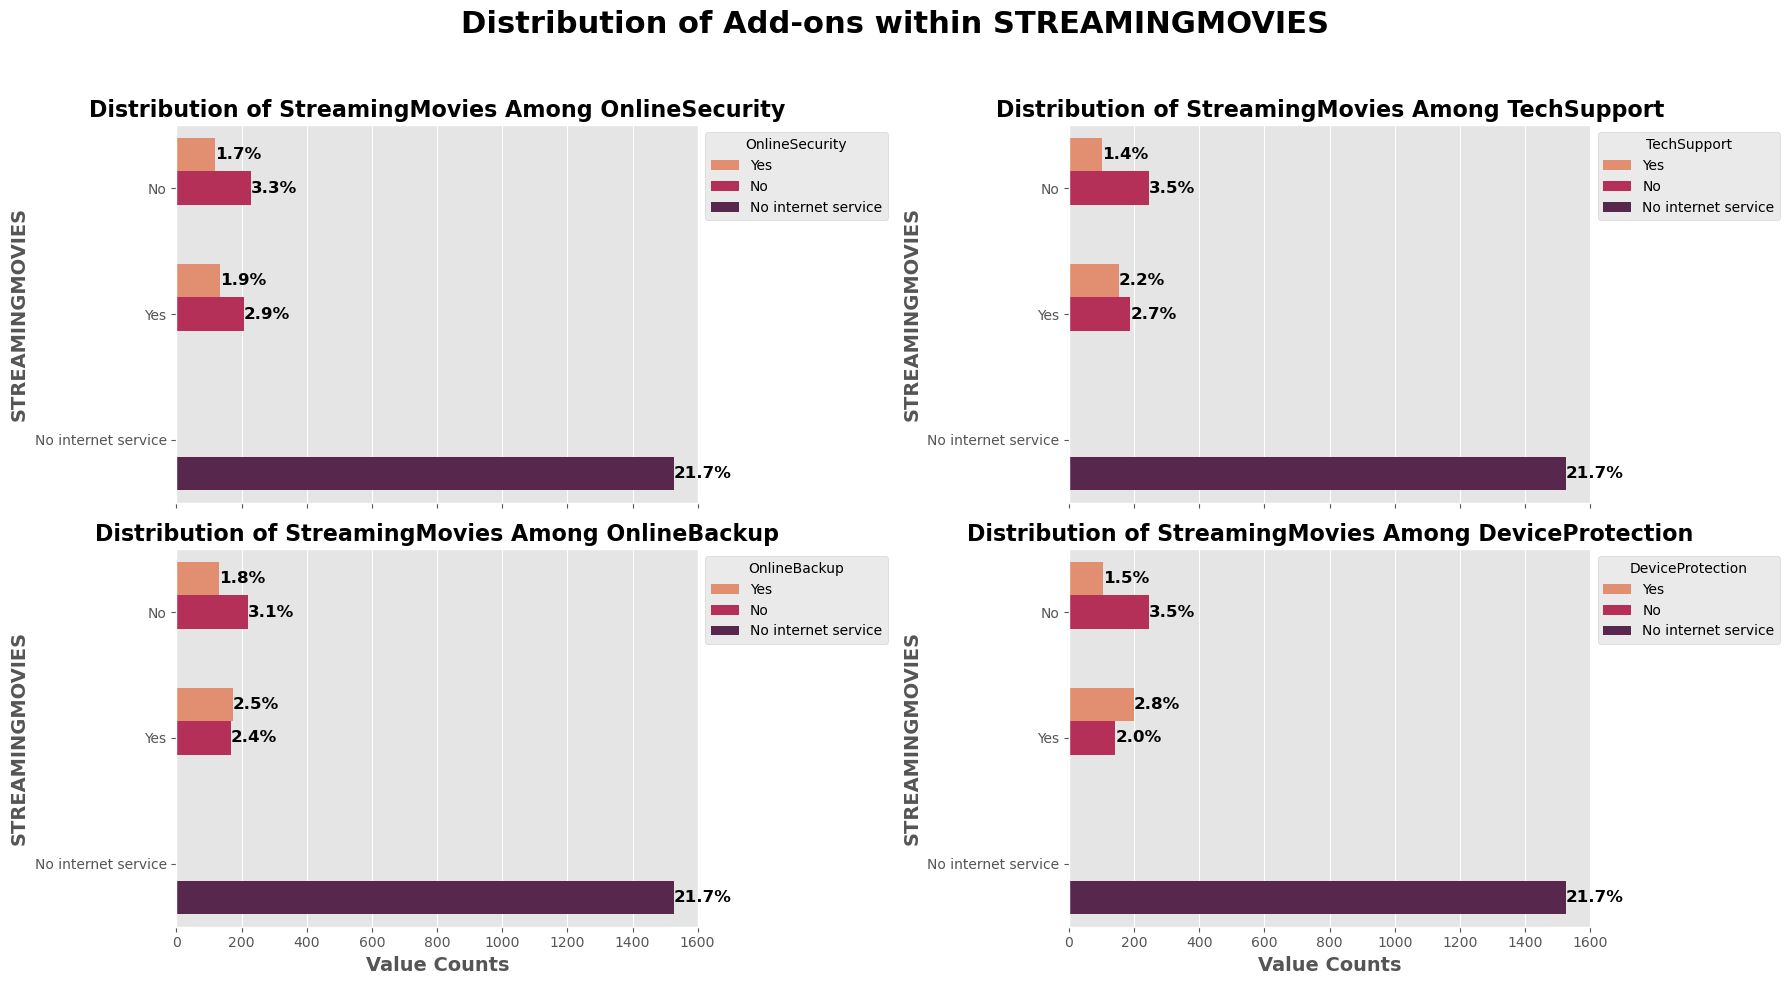


---------------
FEATURE: CONTRACT
---------------


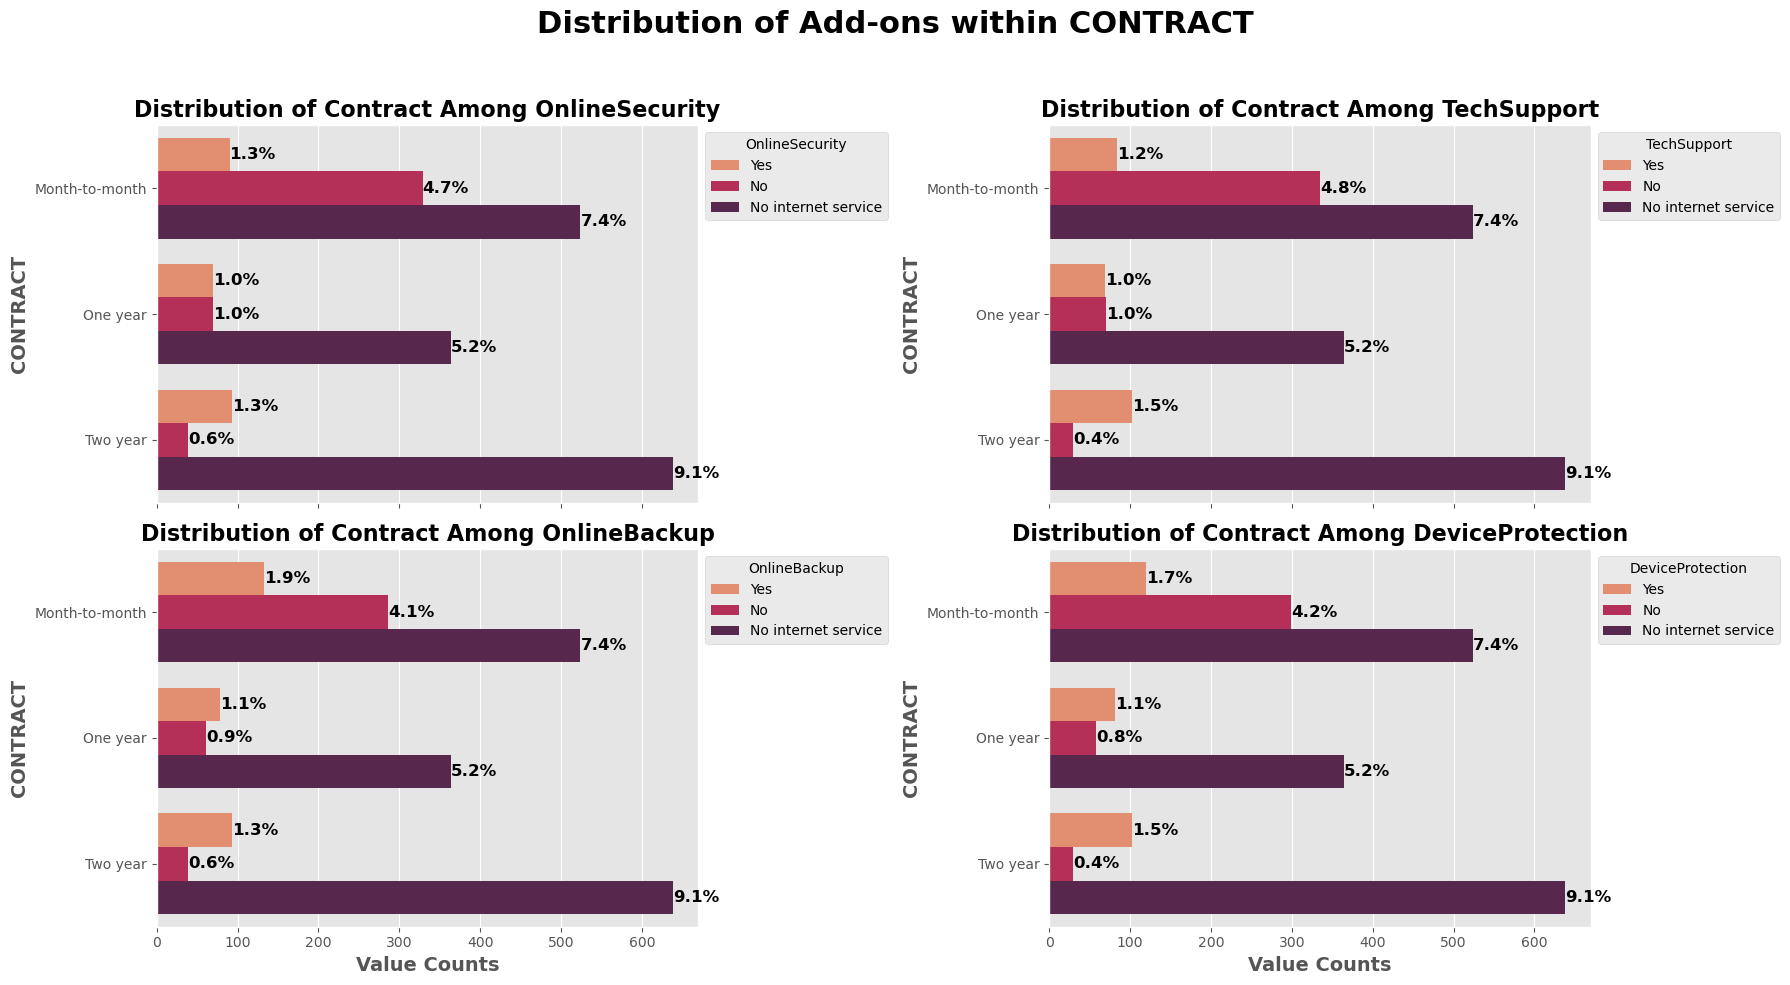

In [11]:
for column in df_nominal.columns:
    if column in add_ons + ['Churn']:
        continue
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    grouped = df_nominal.groupby(add_ons + [column]).size().rename('count').reset_index()
    fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharex=True)
    axes = axes.flatten()
    for index, add_on in enumerate(add_ons):
        ax = axes[index]
        sns.barplot(ax=ax, data=grouped, x='count', y=column, hue=add_on,
                    hue_order=['Yes','No','No internet service'], palette='rocket_r', errorbar=None)
        plt.suptitle(f'Distribution of Add-ons within {column.upper()}', fontsize=22, fontweight='bold')
        plt.subplots_adjust(top=0.9)
        ax.set_title(f'Distribution of {column} Among {add_on}', fontsize=16, fontweight='semibold')
        ax.set_xlabel('Value Counts', fontsize=14, fontweight='semibold')
        ax.set_ylabel(column.upper(), fontsize=14, fontweight='semibold')
        ax.legend(title=add_on, bbox_to_anchor=(1, 1), loc='upper left')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot        
        for p in ax.patches:
            if p.get_width() > 0:
                percentage = p.get_width() / df_nominal[column].value_counts().sum() * 100
                ax.annotate(f'{percentage:.1f}%',
                            (p.get_width(), p.get_y() + p.get_height() / 2.),
                            ha='left', va='center',
                            xytext=(0, 0),  # Adjust spacing
                            textcoords='offset points', fontweight='semibold', fontsize=12, color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### Groupby `Add-ons` and `Churn`


---------------
FEATURE: GENDER
---------------


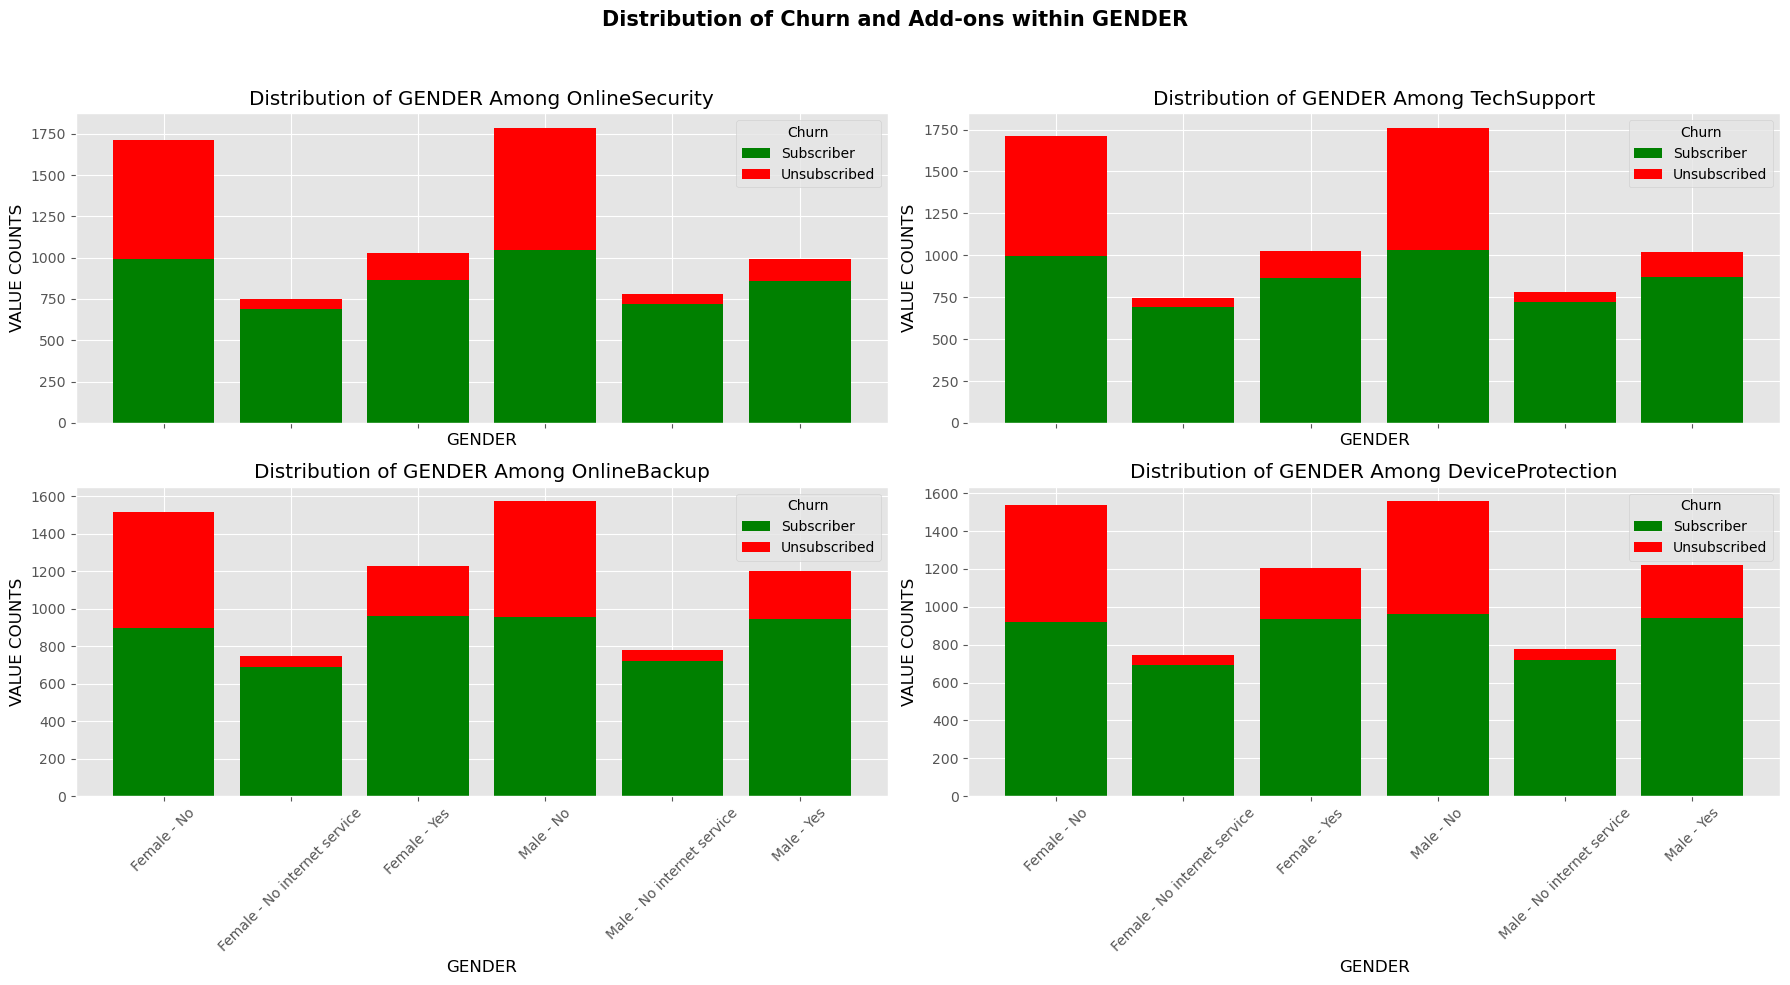


---------------
FEATURE: SENIORCITIZEN
---------------


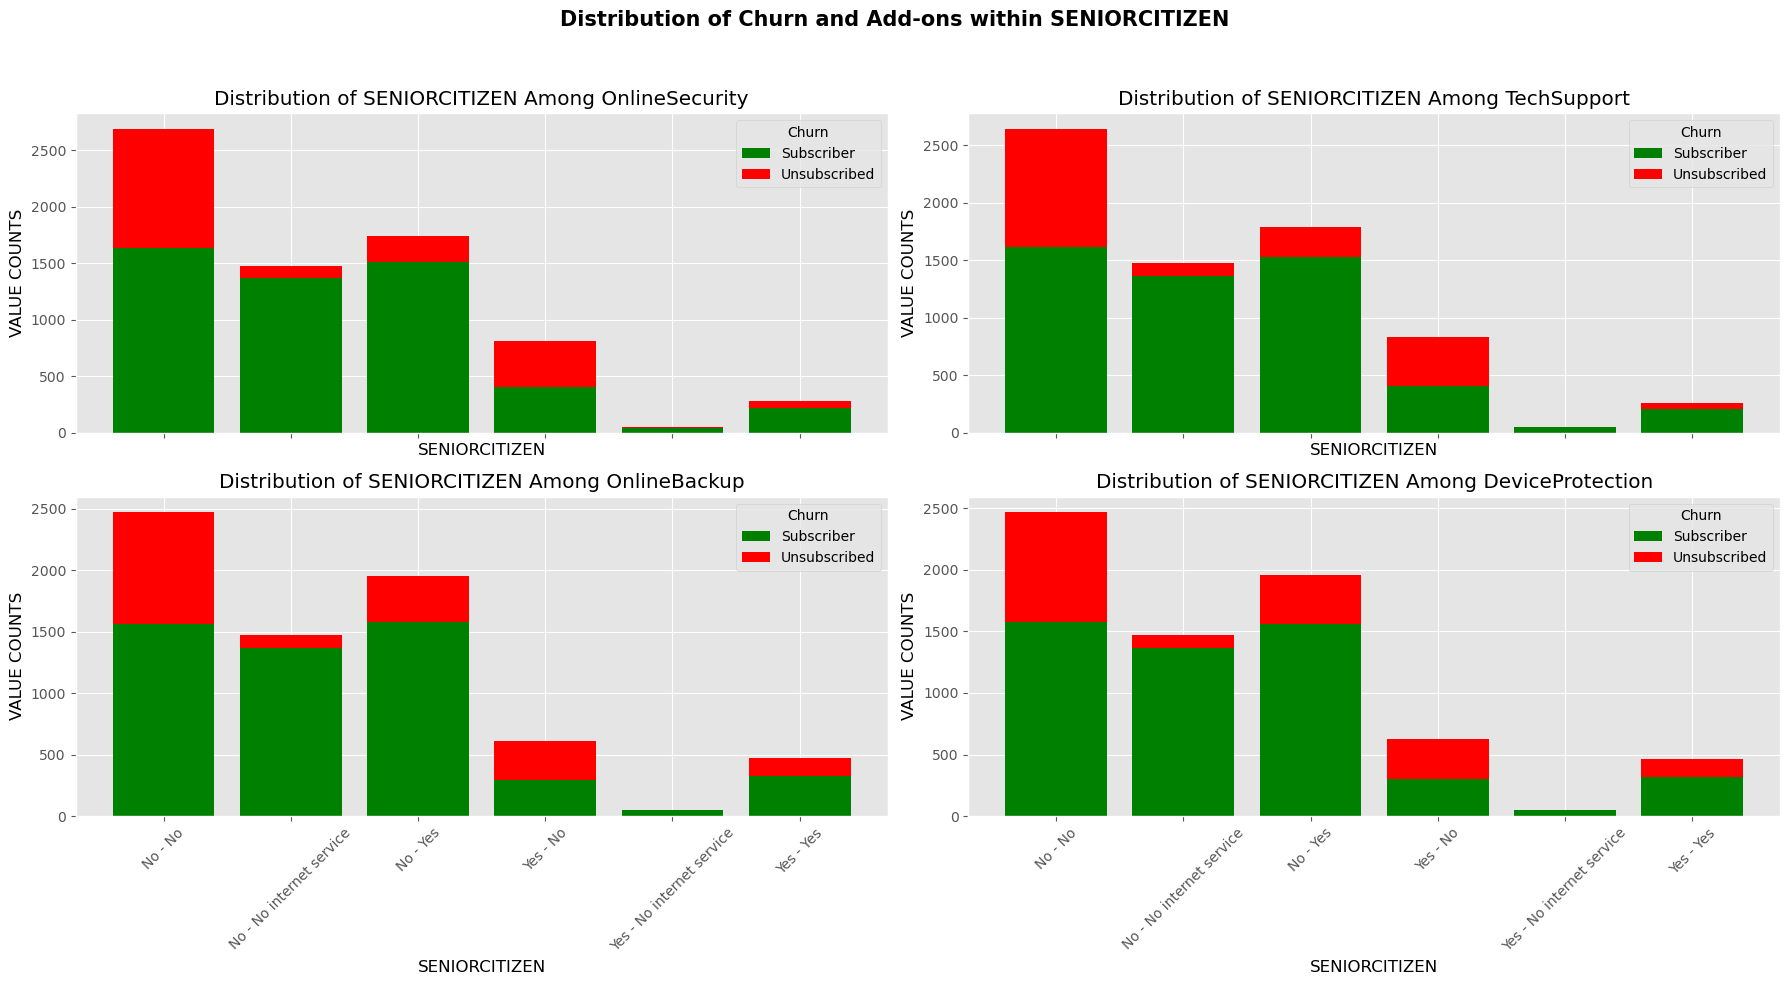


---------------
FEATURE: PARTNER
---------------


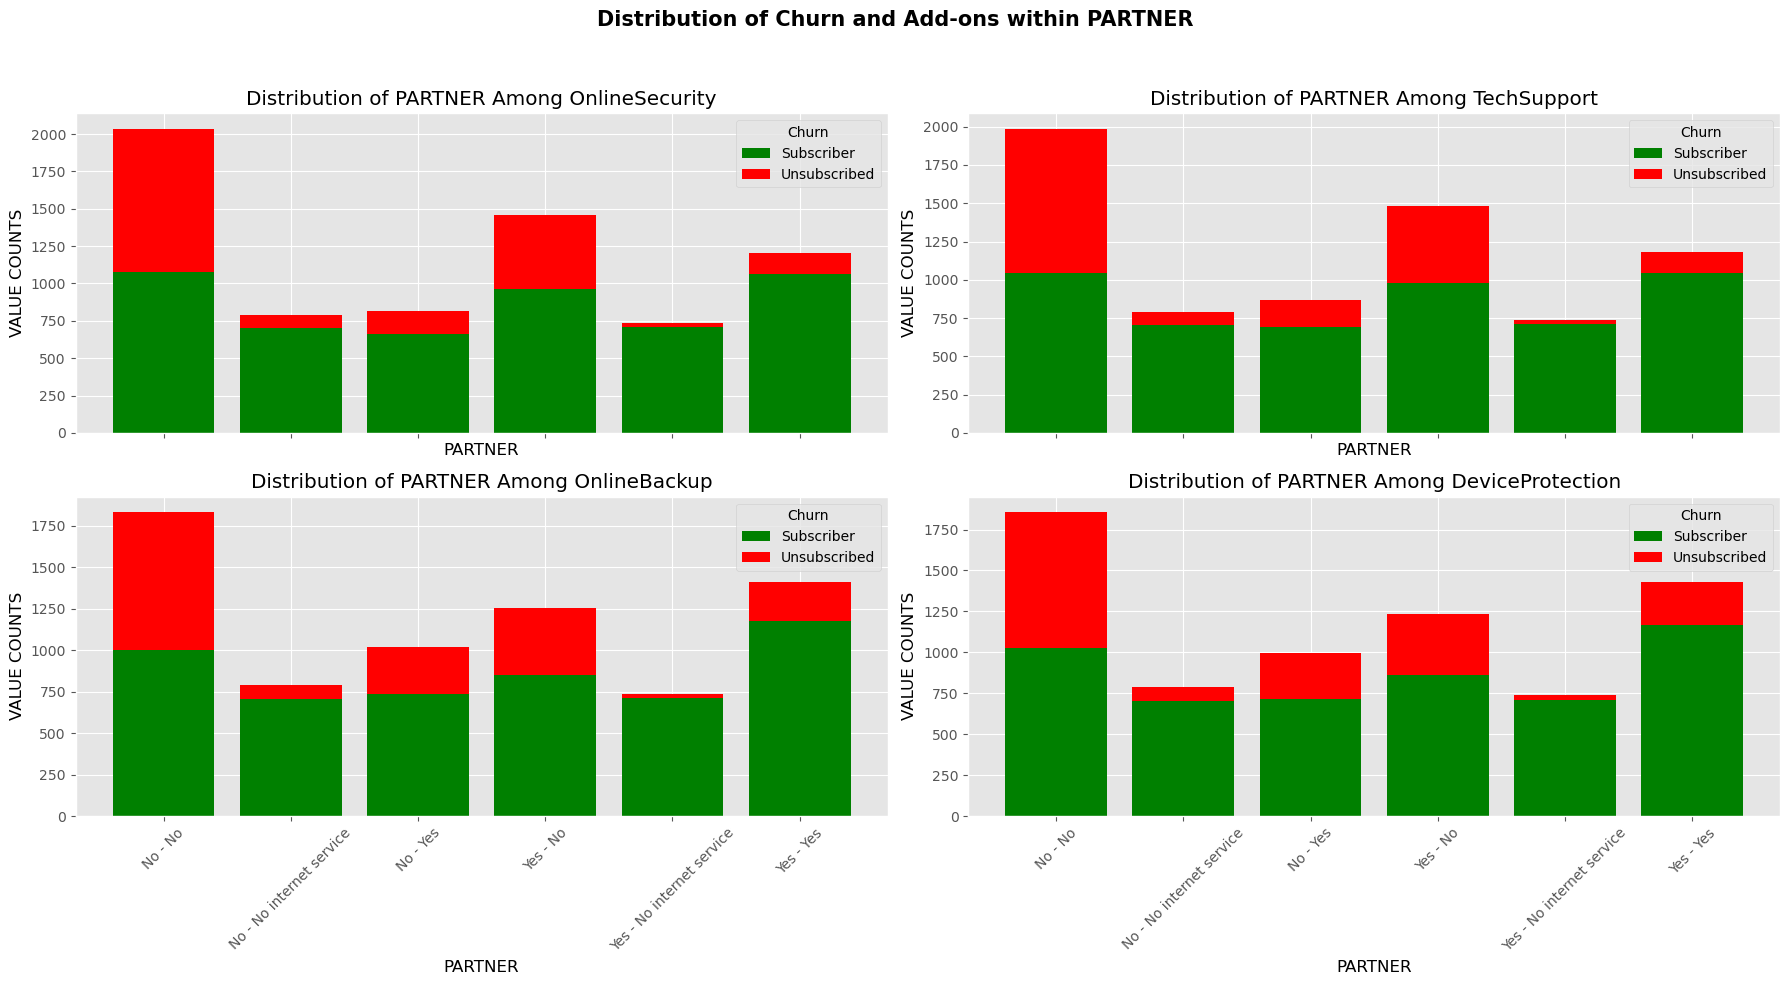


---------------
FEATURE: DEPENDENTS
---------------


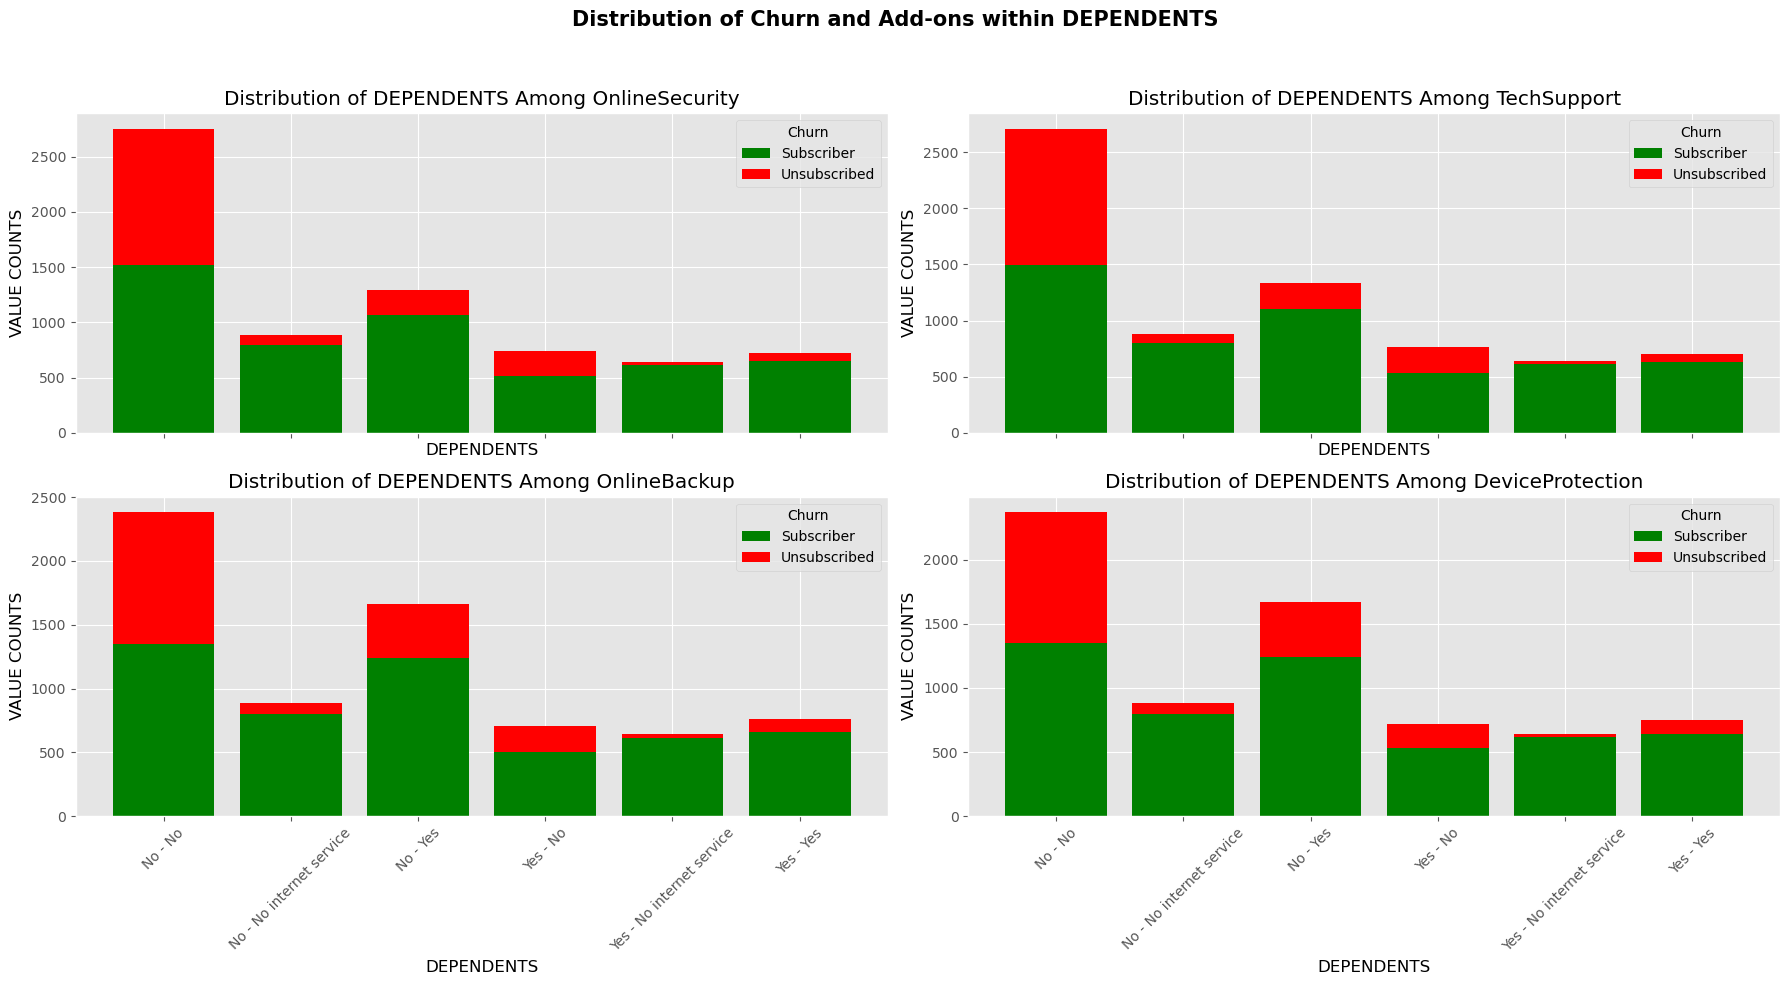


---------------
FEATURE: PHONESERVICE
---------------


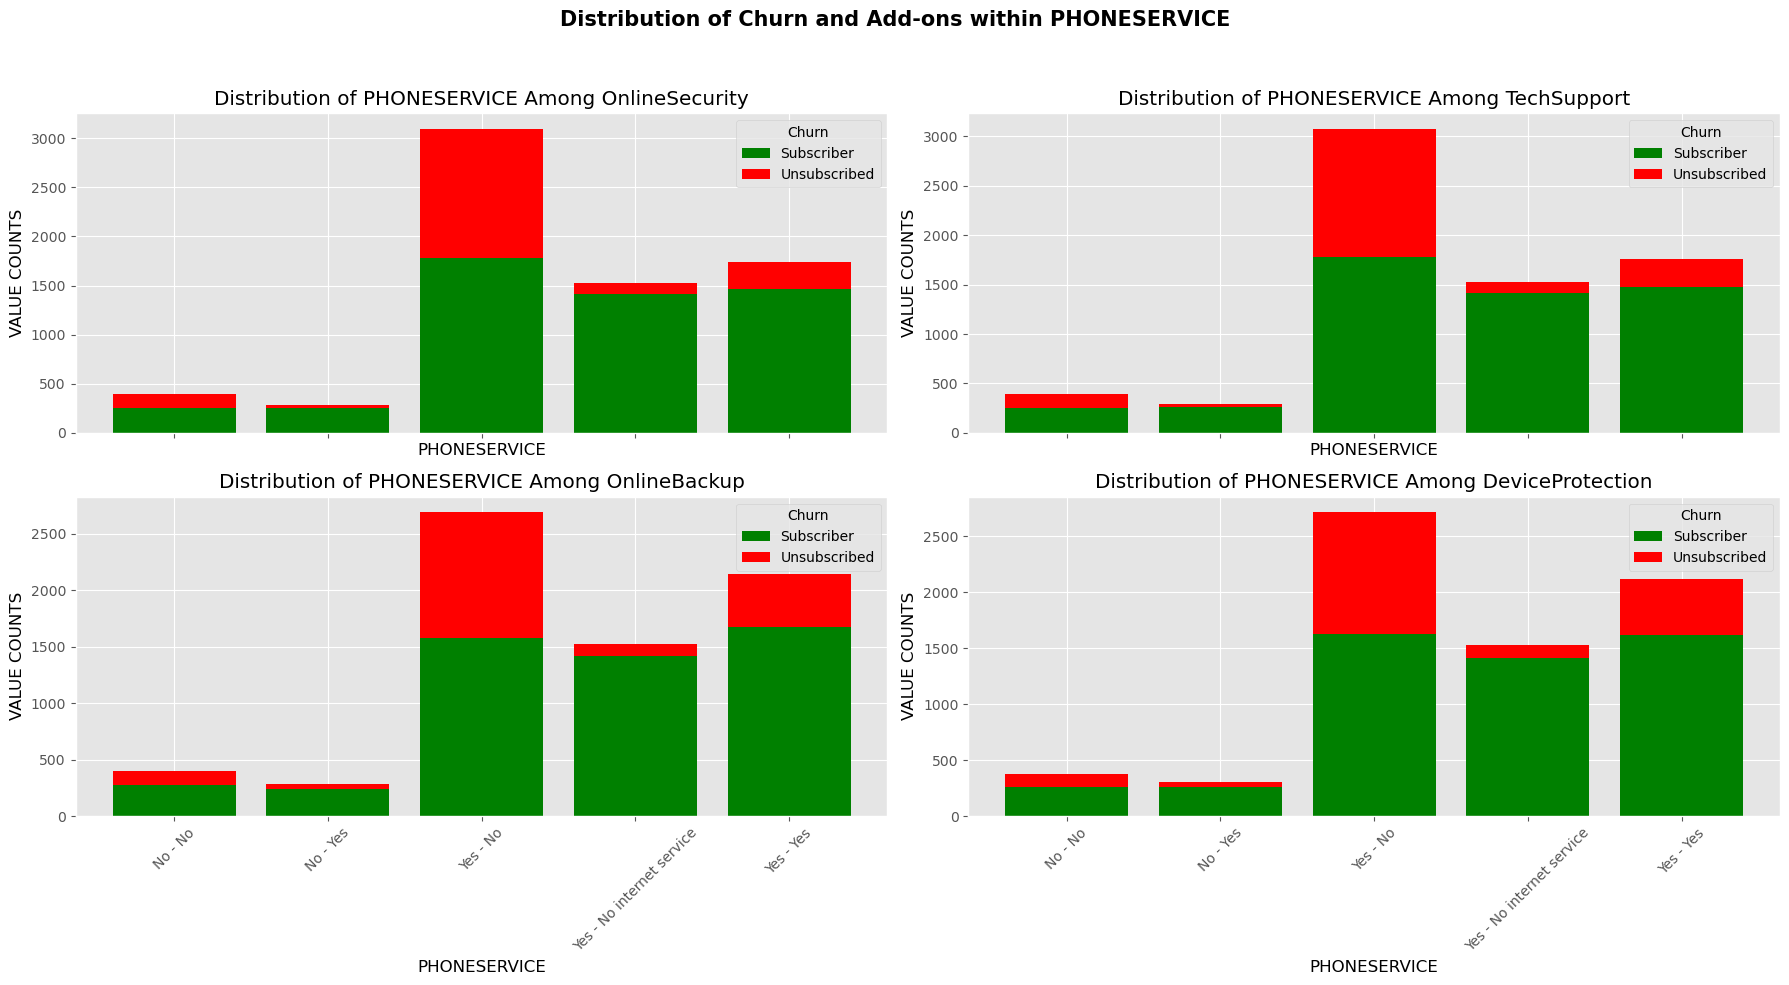


---------------
FEATURE: MULTIPLELINES
---------------


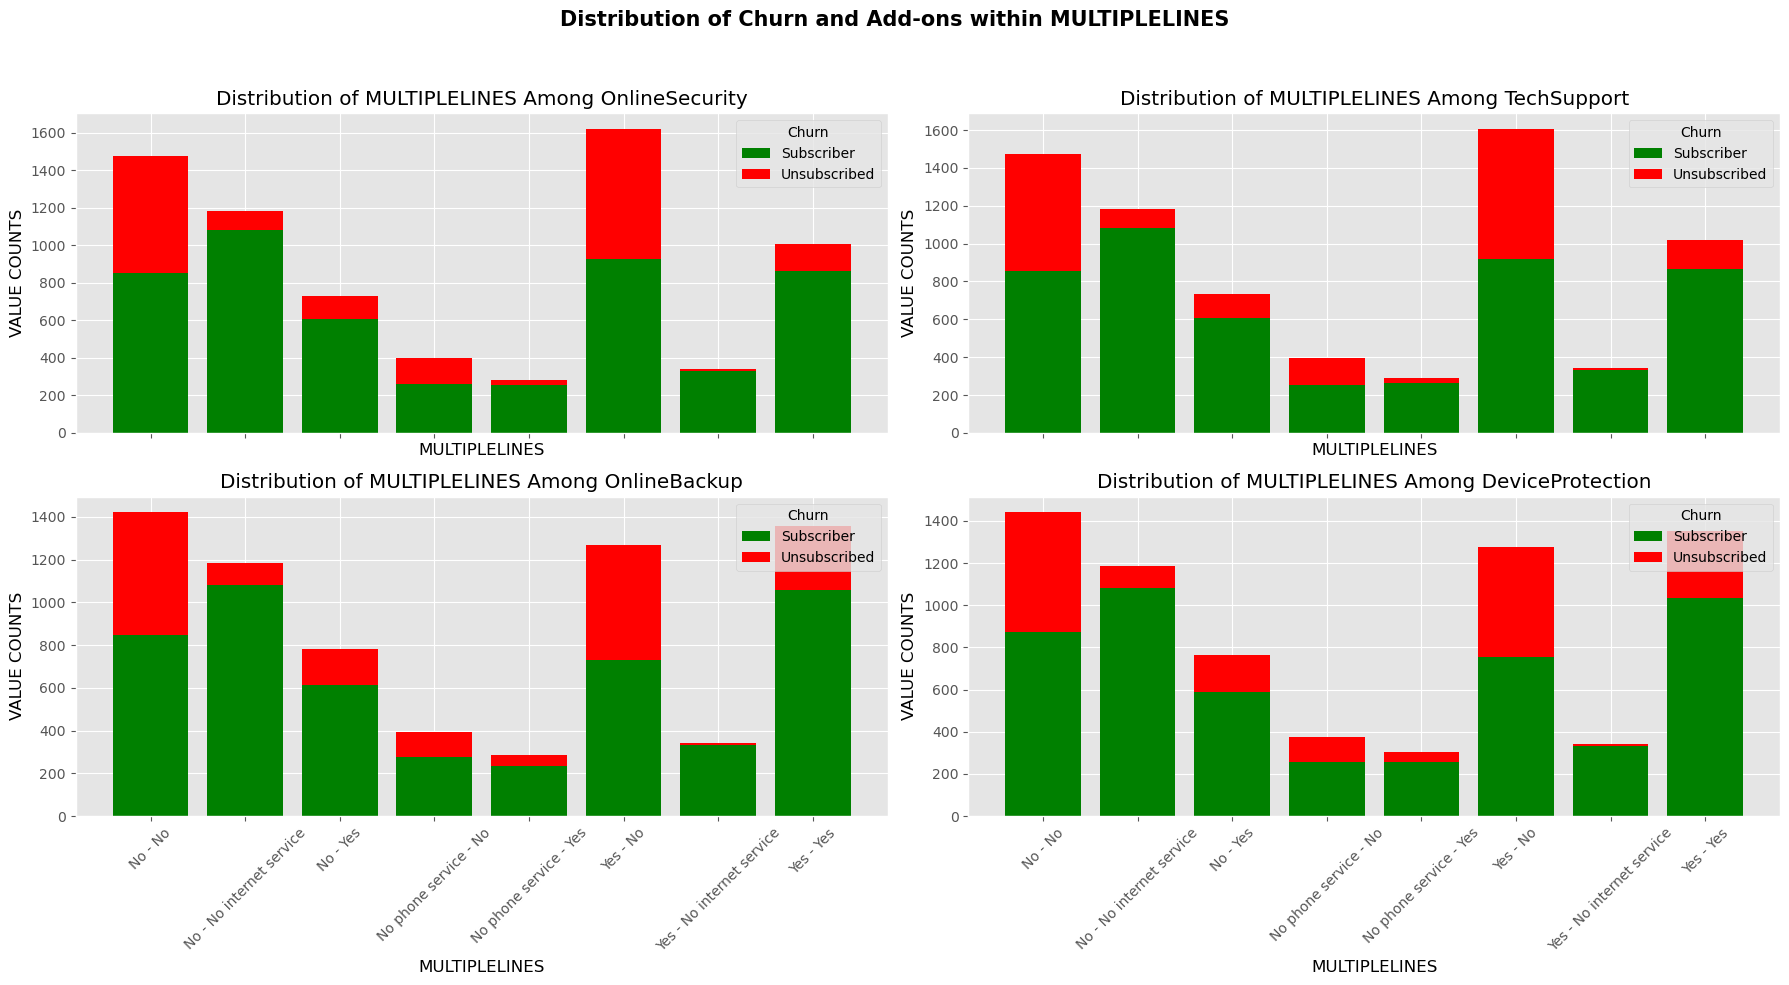


---------------
FEATURE: INTERNETSERVICE
---------------


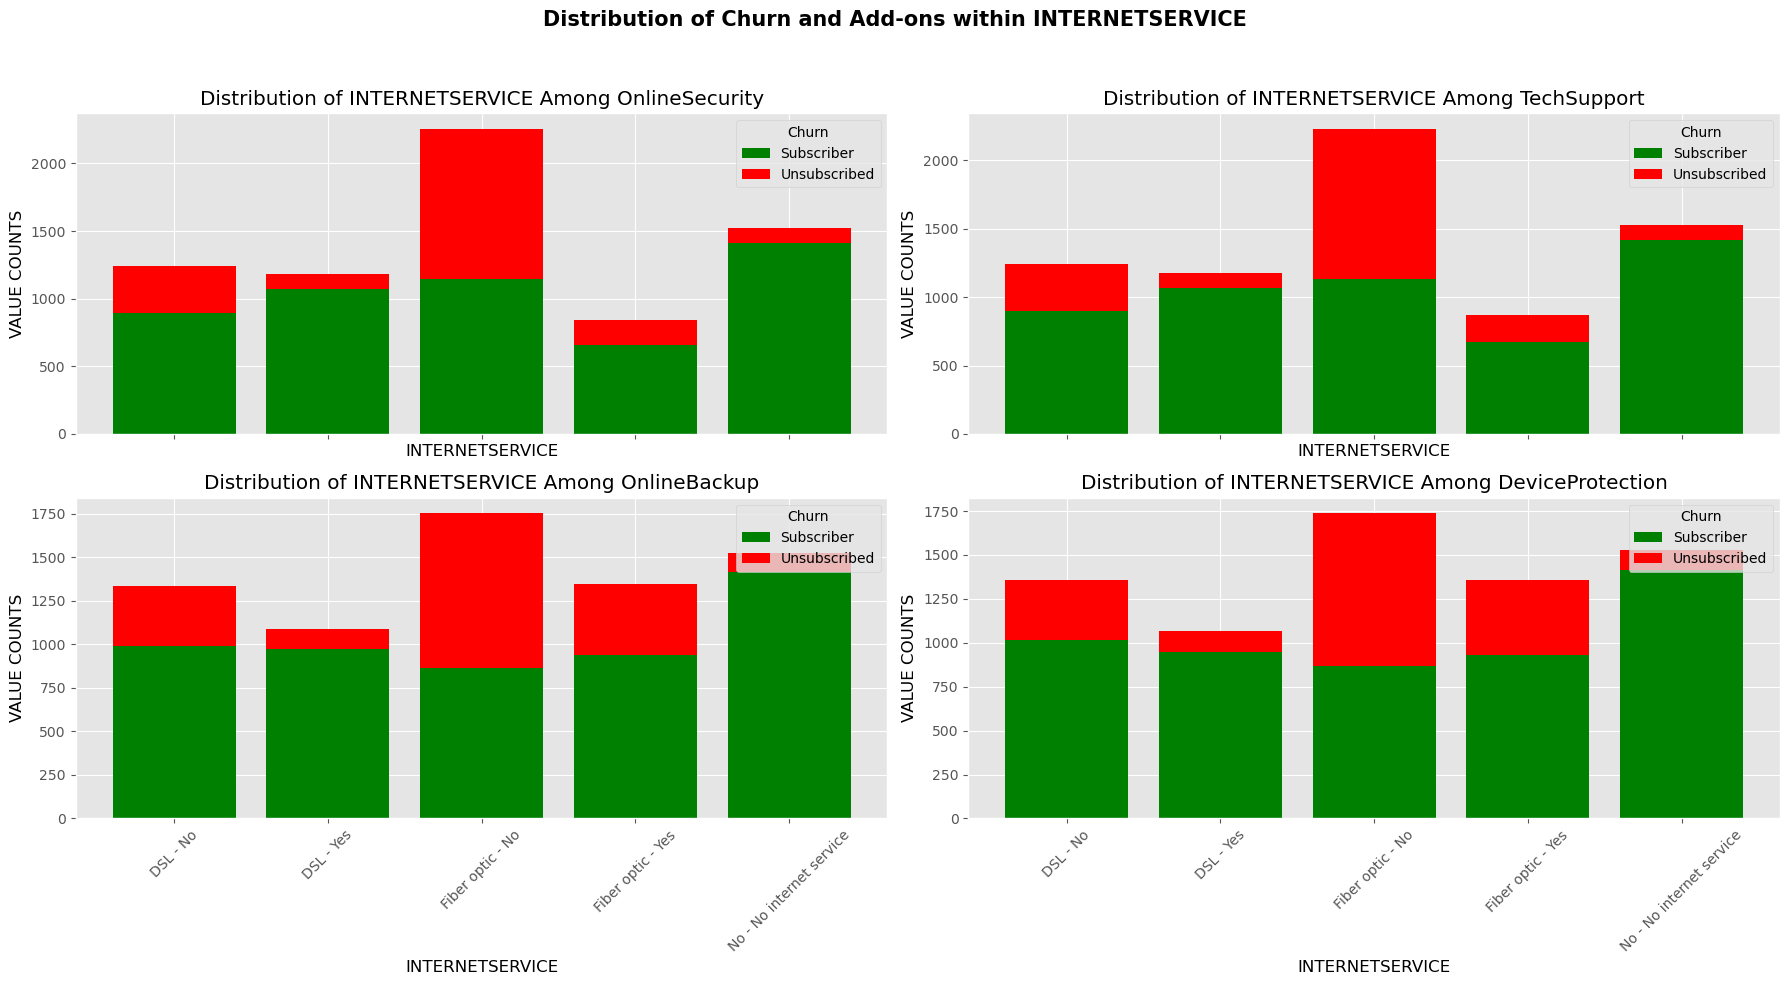


---------------
FEATURE: STREAMINGTV
---------------


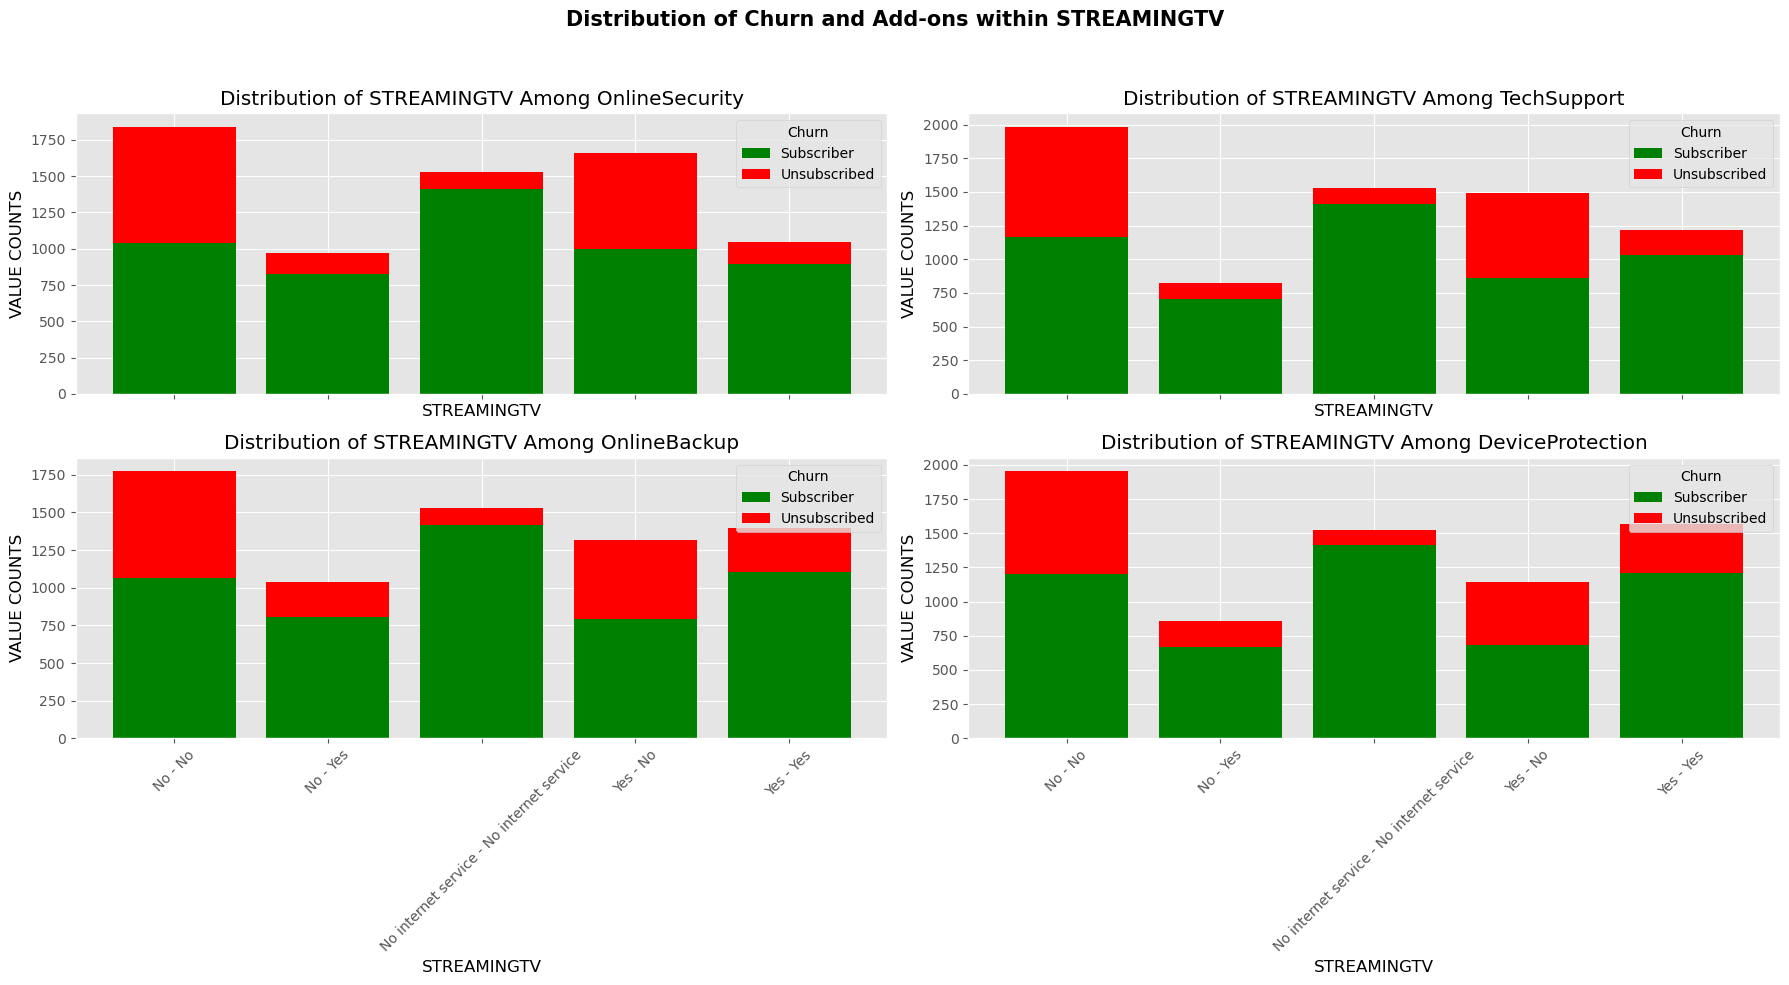


---------------
FEATURE: STREAMINGMOVIES
---------------


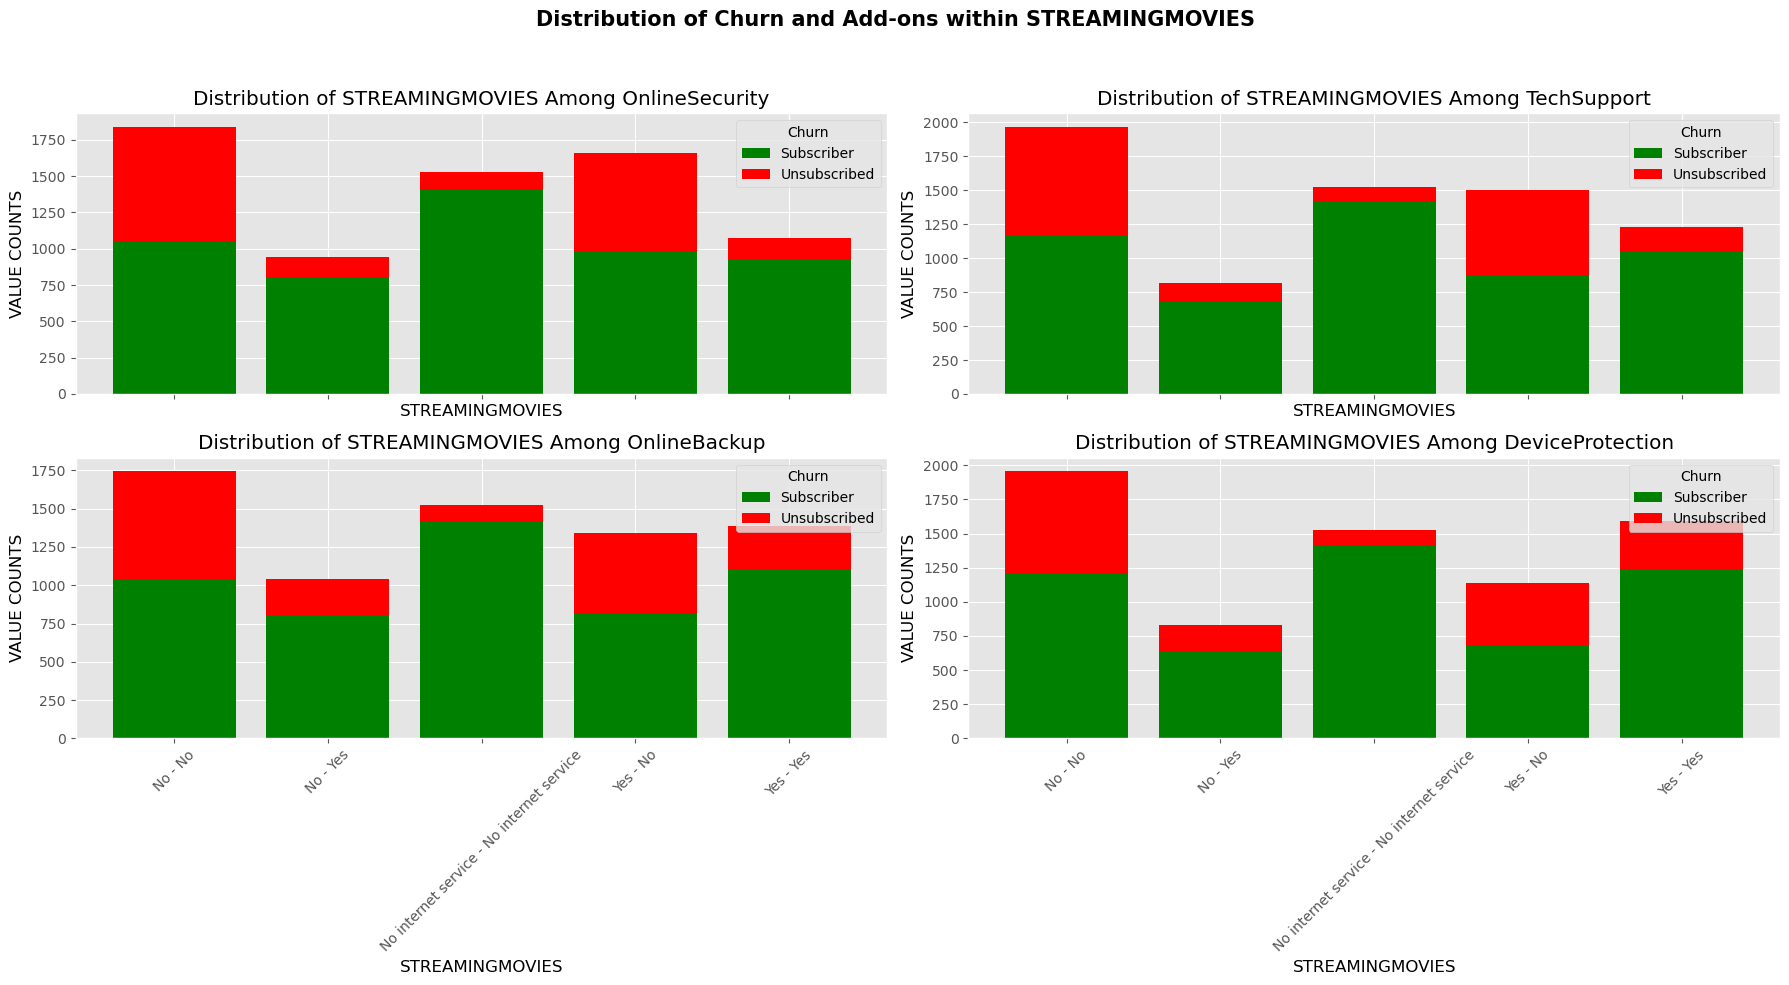


---------------
FEATURE: CONTRACT
---------------


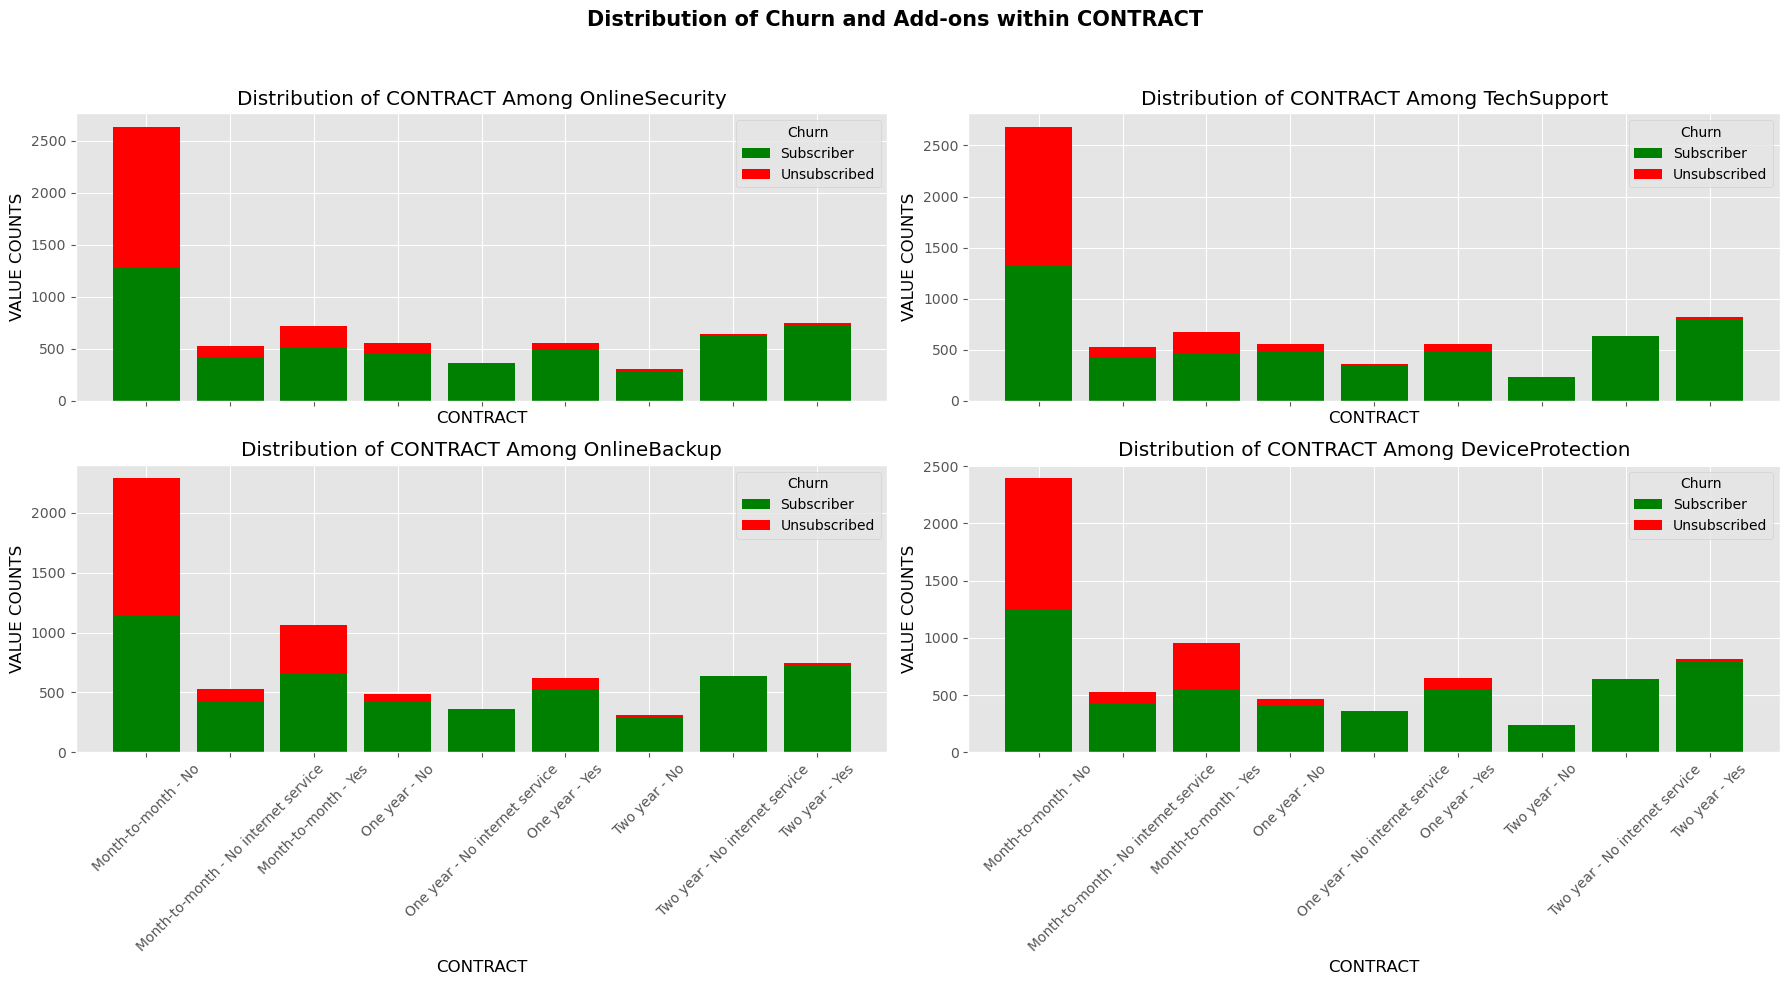

In [12]:
for column in df_nominal.columns:
    if column in add_ons + ['Churn']:
        continue
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharex=True)
    axes = axes.flatten()
    for index, add_on in enumerate(add_ons):
        ax = axes[index]
        grouped = df_nominal.groupby([column, add_on, 'Churn']).size().reset_index(name='count')
# Everything pivot_df Created by ChatGPT
        pivot_df = grouped.pivot_table(index=[column, add_on], columns='Churn', values='count', fill_value=0)
        pivot_df = pivot_df.reset_index()
        colors = {'Subscriber': 'green', 'Unsubscribed': 'red'}
        for churn_status in pivot_df.columns[2:]:
            ax.bar(
                pivot_df.index,
                pivot_df[churn_status],
                bottom=pivot_df[pivot_df.columns[2:]].cumsum(axis=1)[churn_status] - pivot_df[churn_status],
                label=churn_status,
                color=colors[churn_status]
            )
        ax.set_xticks(pivot_df.index)
        ax.set_xticklabels([f'{row[0]} - {row[1]}' for row in pivot_df[[column, add_on]].values], rotation=45)
        ax.set_title(f'Distribution of {column.upper()} Among {add_on}', color='black')
        ax.set_xlabel(f'{column.upper()}', color='black')
        ax.set_ylabel('Value Counts'.upper(), color='black')
        ax.legend(title='Churn', bbox_to_anchor=(1, 1), loc='upper right')
    plt.suptitle(f'Distribution of Churn and Add-ons within {column.upper()}', fontsize=15, fontweight='bold', color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Business Recommendations

### 1. There exists an irregular proportion of Churn among the customers subscribed to `InternetService`, specifically the service type `Fiber-optic` churns faster than `DSL`.

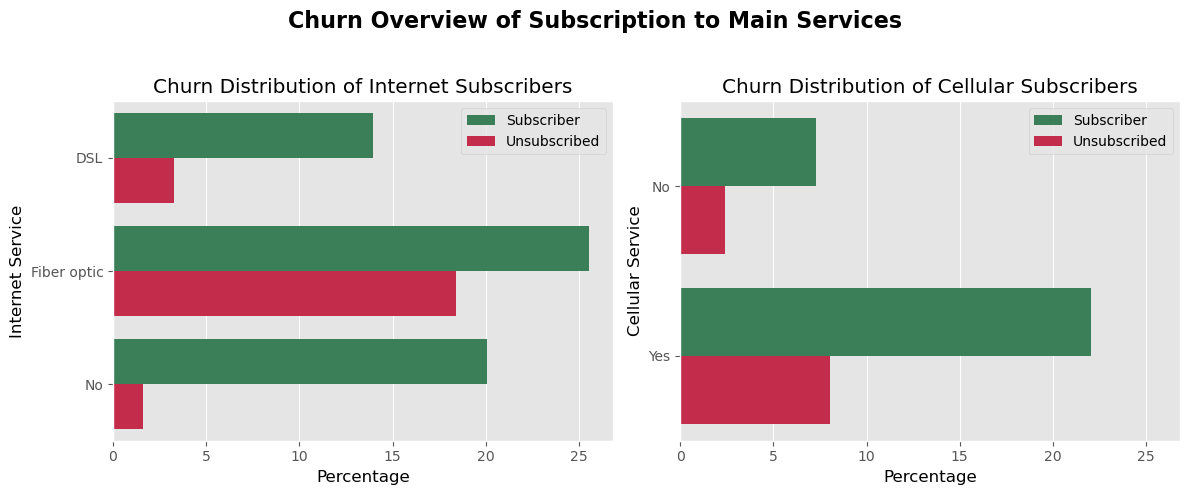

In [13]:
grouped = df_nominal.groupby(['Churn', 'InternetService', 'PhoneService']).size().rename('count').reset_index()
grouped['percentage'] = (grouped['count']/grouped['count'].sum()) * 100

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 5), sharex=True)
sns.barplot(ax=ax1, data=grouped, x='percentage', y='InternetService', hue='Churn',
            palette={'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'}, errorbar=None)
ax1.set_title('Churn Distribution of Internet Subscribers', color='black')
ax1.set_xlabel('Percentage', color='black')
ax1.set_ylabel('Internet Service', color='black')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper right')

sns.barplot(ax=ax2, data=grouped, x='percentage', y='PhoneService', hue='Churn',
            palette={'Subscriber':'seagreen','Unsubscribed':'crimson'}, errorbar=None)
ax2.set_title('Churn Distribution of Cellular Subscribers', color='black')
ax2.set_xlabel('Percentage', color='black')
ax2.set_ylabel('Cellular Service', color='black')
ax2.legend(bbox_to_anchor=(1,1), loc='upper right')

plt.suptitle('Churn Overview of Subscription to Main Services', fontsize=16, fontweight='semibold', color='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_1.png')
plt.show()

### 2. Customers enrolled in the various add-ons specifically `OnlineSecurity` and `TechSupport` are amongst the least Churn.

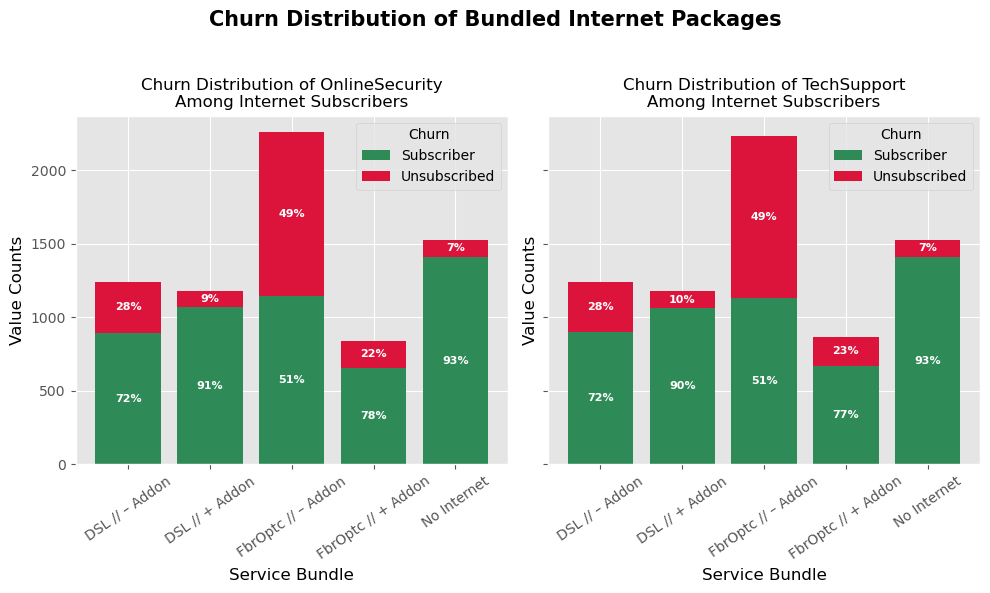

In [14]:
column = 'InternetService'
fig, axes = plt.subplots(1, 2, figsize=(10,6), sharex=True, sharey=True)
axes = axes.flatten()
for index, add_on in enumerate(['OnlineSecurity','TechSupport']):
    ax = axes[index]
    grouped = df_nominal.groupby([column, add_on, 'Churn']).size().reset_index(name='count')
    total_counts = grouped.groupby([column, add_on])['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / total_counts) * 100
    # for churn_status and df_pivot code created by ChatGPT, help with grouping multiple features on 1 x-axis
    pivot_df = grouped.pivot_table(index=[column, add_on], columns='Churn', values='count', fill_value=0)
    pivot_df = pivot_df.reset_index()
    colors = {'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'}
    for churn_status in pivot_df.columns[2:]:
        ax.bar(
            pivot_df.index,
            pivot_df[churn_status],
            bottom=pivot_df[pivot_df.columns[2:]].cumsum(axis=1)[churn_status] - pivot_df[churn_status],
            label=churn_status,
            color=colors[churn_status]
        )
    # for loop below created by ChatGPT, help with putting labels on the barplots
    for i in pivot_df.index:
        bottom = 0
        for churn_status in pivot_df.columns[2:]:
            height = pivot_df.at[i, churn_status]
            if height > 0:
                percentage = (height / pivot_df.loc[i, pivot_df.columns[2:]].sum()) * 100
                ax.text(i, bottom + height / 2, f'{percentage:.0f}%', ha='center', va='center', \
                        color='white', fontsize=8, fontweight='semibold')
            bottom += height
    ax.set_xticks(pivot_df.index)
    ax.set_xticklabels([f'{row[0]} // {row[1]}' for row in pivot_df[[column, add_on]].values], rotation=35)
    ax.set_title(f'Churn Distribution of {add_on}\nAmong Internet Subscribers', fontsize=12,color='black')
    ax.set_xlabel('Service Bundle', color='black')
    ax.set_ylabel('Value Counts', color='black')
    ax.legend(title='Churn', bbox_to_anchor=(1, 1), loc='upper right')
plt.xticks([0,1,2,3,4],['DSL // – Addon','DSL // + Addon','FbrOptc // – Addon','FbrOptc // + Addon','No Internet'])
plt.suptitle('Churn Distribution of Bundled Internet Packages', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_2.png')
plt.show()

### 3. Customers that churn among the most in the data are of `high MonthlyCharges` that are subscribed to `MonthlyContract` especially when the charges reach over $75.

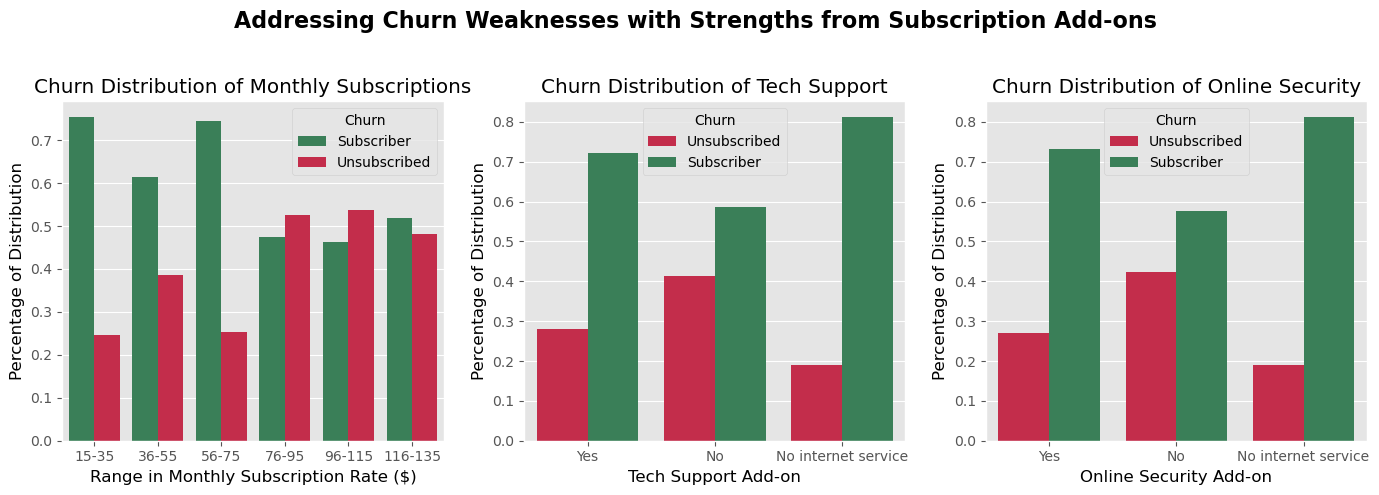

In [15]:
sub_monthly_churn = df[df['Contract'] == 'Month-to-month'].copy()
sub_range = np.linspace(sub_monthly_churn['MonthlyCharges'].min(),sub_monthly_churn['MonthlyCharges'].max(),7)
sub_labels = ['15-35','36-55','56-75','76-95','96-115','116-135']
sub_monthly_churn['subscription'] = pd.cut(sub_monthly_churn['MonthlyCharges'], 
                                           bins = sub_range, 
                                           labels=sub_labels)
sub_monthly_churn = sub_monthly_churn.groupby('subscription')['Churn'].value_counts(normalize=True).reset_index()

add_on_churn = df[df['Contract'] == 'Month-to-month'].copy()
add_on_churn = add_on_churn.groupby(
    ['OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport']
)['Churn'].value_counts(normalize=True).reset_index()

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,5))

sns.barplot(ax=ax1, data=sub_monthly_churn, x='subscription', y='proportion', hue='Churn', 
            palette={'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'}, errorbar=None)
ax1.set_title('Churn Distribution of Monthly Subscriptions')
ax1.set_xlabel('Range in Monthly Subscription Rate ($)', color='black')
ax1.set_ylabel('Percentage of Distribution', color='black')

sns.barplot(ax=ax2, data=add_on_churn, x='TechSupport', y='proportion',
            hue='Churn', palette={'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'},
            order=['Yes','No','No internet service'], errorbar=None)
ax2.set_title('Churn Distribution of Tech Support')
ax2.set_xlabel('Tech Support Add-on', color='black')
ax2.set_ylabel('Percentage of Distribution',color='black')

sns.barplot(ax=ax3, data=add_on_churn, x='OnlineSecurity', y='proportion', 
            hue='Churn', palette={'Subscriber': 'seagreen', 'Unsubscribed': 'crimson'},
            order=['Yes','No','No internet service'], errorbar=None)
ax3.set_title('Churn Distribution of Online Security', color='black')
ax3.set_xlabel('Online Security Add-on', color='black')
ax3.set_ylabel('Percentage of Distribution', color='black')
plt.suptitle('Addressing Churn Weaknesses with Strengths from Subscription Add-ons', fontsize=16, fontweight='semibold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../images/solution_3.png')
plt.show()

In [16]:
try:
    print('Script Executed Successfully.')
except:
    print('FAILED')

Script Executed Successfully.
